Первая часть таблицы:
                   Region  January 2023  Febuary 2023  March 2023  April 2023  \
0  Қазақстан Республикасы         21462         18610       20842       20326   
1                    Abay           350           340         324         374   
2                  Akmola           328           265         317         331   
3                  Aktobe          1127           996        1133        1058   
4                  Almaty          1974          1749        1914        1838   

   May 2023  June 2023  Jule 2023  August 2023  September 2023  ...  \
0     23978      20696      22492        23616           22731  ...   
1       523        326        460          453             431  ...   
2       478        330        438          385             373  ...   
3      1169       1067       1099         1298            1177  ...   
4      2237       1899       2110         2342            2188  ...   

   December 2023  January 2024  Febuary 2024  March 2024  April 

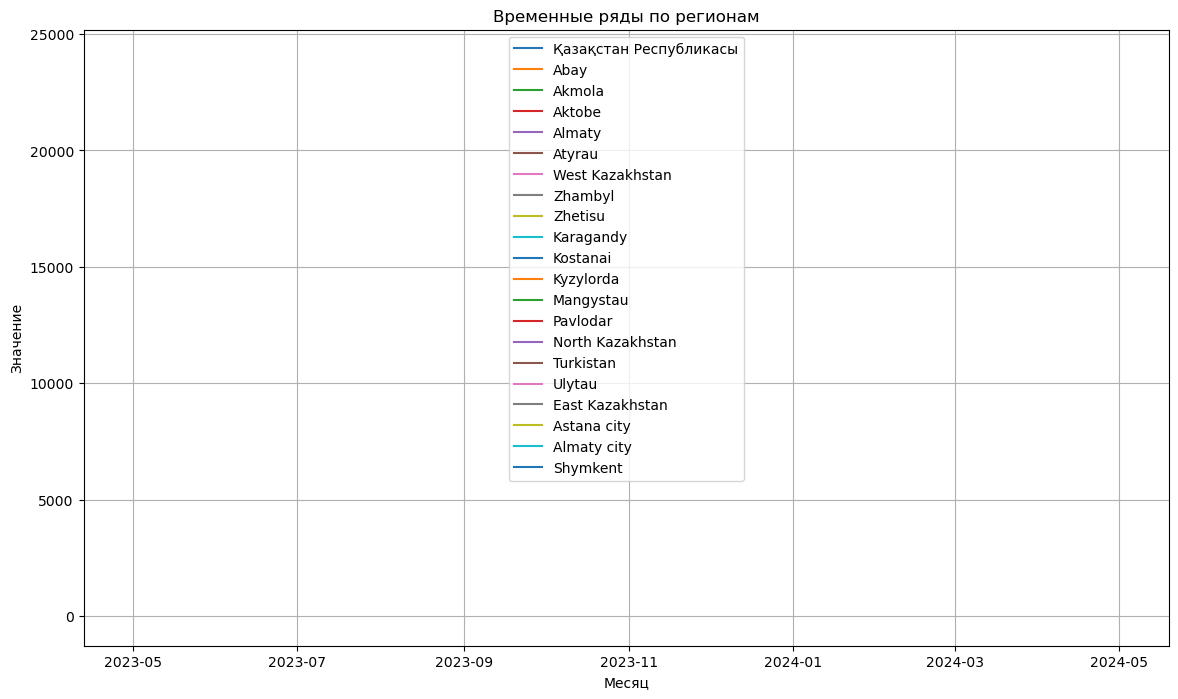

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем файл
file_path = '2.xlsx'
data = pd.ExcelFile(file_path)

# Считываем первый лист (можно уточнить, если другой)
df = data.parse(sheet_name=0)

# Предварительный осмотр данных
print("Первая часть таблицы:")
print(df.head())

# Проверяем информацию о данных
df.info()

# Преобразуем данные, если нужно (например, удалим лишние пробелы из заголовков)
df.columns = df.columns.str.strip()

# Шаг 1: Описательная статистика
# Рассчитываем основные показатели: среднее, медиану, стандартное отклонение
summary_stats = df.describe()
print("\nОписательная статистика:")
print(summary_stats)

# Шаг 2: Построение временных рядов
# Преобразуем таблицу для анализа временных рядов, если нужно (pivot)
df_long = pd.melt(df, id_vars=['Region'], var_name='Month', value_name='Value')

# Преобразуем месяц в дату (если понадобится для анализа трендов)
df_long['Month'] = pd.to_datetime(df_long['Month'], errors='coerce', format='%b %Y')

# График временных рядов для всех регионов
plt.figure(figsize=(14, 8))
for region in df['Region'].unique():
    region_data = df_long[df_long['Region'] == region]
    plt.plot(region_data['Month'], region_data['Value'], label=region)

plt.legend()
plt.title('Временные ряды по регионам')
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.grid()
plt.show()

# Дальнейшие шаги (кластеризация, корреляция, прогнозирование) добавим после результатов выше.


In [7]:
print("Колонки в таблице:", df.columns.tolist())


Колонки в таблице: ['Region', 'January 2023', 'Febuary 2023', 'March 2023', 'April 2023', 'May 2023', 'June 2023', 'Jule 2023', 'August 2023', 'September 2023', 'October 2023', 'November 2023', 'December 2023', 'January 2024', 'Febuary 2024', 'March 2024', 'April 2024', 'May 2024', 'June 2024', 'Jule 2024', 'August 2024', 'September 2024']


In [11]:
# Исправляем названия колонок
df.columns = df.columns.str.replace('Febuary', 'February')
df.columns = df.columns.str.replace('Jule', 'July')

# Проверяем после замены
print("Исправленные колонки:", df.columns.tolist())


Исправленные колонки: ['Region', 'January 2023', 'February 2023', 'March 2023', 'April 2023', 'May 2023', 'June 2023', 'July 2023', 'August 2023', 'September 2023', 'October 2023', 'November 2023', 'December 2023', 'January 2024', 'February 2024', 'March 2024', 'April 2024', 'May 2024', 'June 2024', 'July 2024', 'August 2024', 'September 2024']


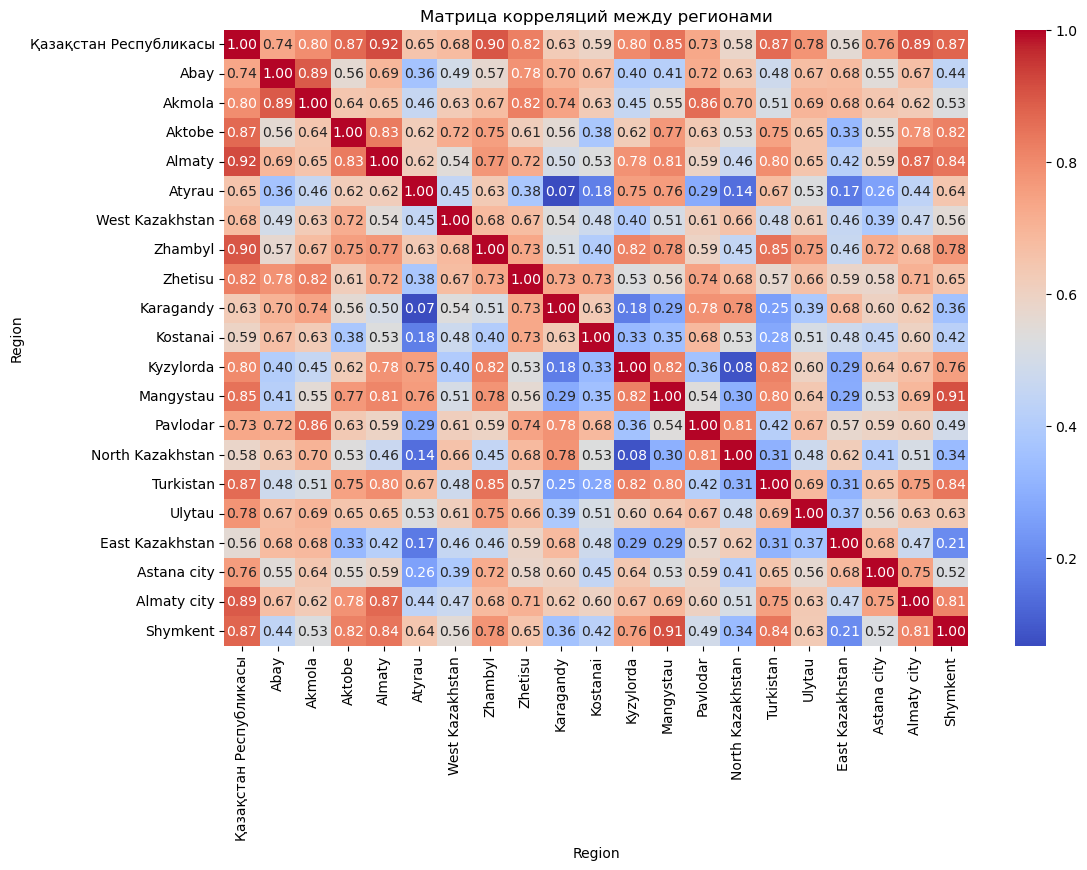

In [19]:
# Переводим данные в числовой формат (убираем текстовые колонки)
numeric_data = df.set_index('Region').select_dtypes(include='number')

# Считаем корреляцию
correlation_matrix = numeric_data.T.corr()

# Визуализируем
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Матрица корреляций между регионами')
plt.show()


Прогноз на следующие 12 месяцев: [19571.04431969 19628.25277598 19606.13258793 19614.68556683
 19611.37847704 19612.65719443 19612.16276632 19612.3539416
 19612.28002188 19612.30860364 19612.29755223 19612.30182536]


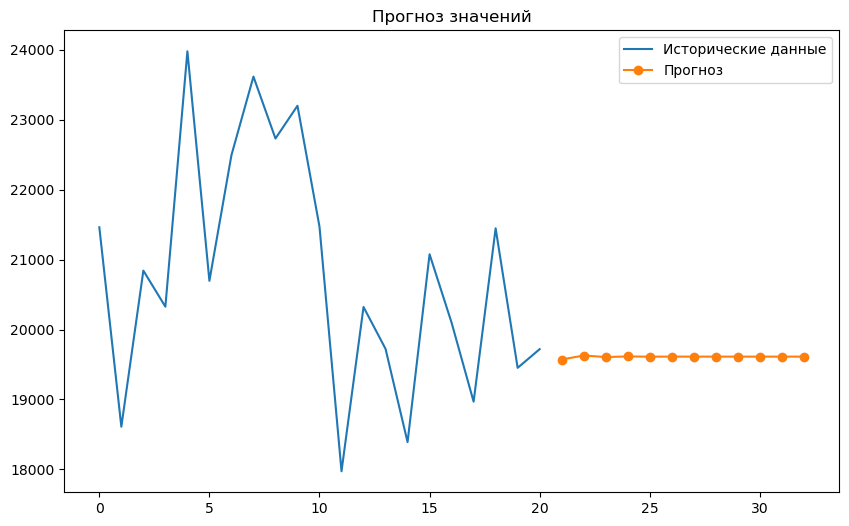

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Выбираем временной ряд для региона
region_series = df.set_index('Region').loc['Қазақстан Республикасы'].values

# Строим модель ARIMA
model = ARIMA(region_series, order=(1, 1, 1))
model_fit = model.fit()

# Прогноз на 12 месяцев
forecast = model_fit.forecast(steps=12)
print("Прогноз на следующие 12 месяцев:", forecast)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(region_series, label='Исторические данные')
plt.plot(range(len(region_series), len(region_series) + 12), forecast, label='Прогноз', marker='o')
plt.legend()
plt.title('Прогноз значений')
plt.show()


In [23]:
# Исправляем названия колонок
df.columns = df.columns.str.replace('Febuary', 'February')
df.columns = df.columns.str.replace('Jule', 'July')

# Преобразуем данные в длинный формат (id_vars — Region, остальные — значения по месяцам)
df_long = pd.melt(df, id_vars=['Region'], var_name='Month', value_name='Value')

# Преобразуем названия месяцев в формат дат
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%B %Y', errors='coerce')

# Проверяем результат
print(df_long.head())


                   Region      Month  Value
0  Қазақстан Республикасы 2023-01-01  21462
1                    Abay 2023-01-01    350
2                  Akmola 2023-01-01    328
3                  Aktobe 2023-01-01   1127
4                  Almaty 2023-01-01   1974


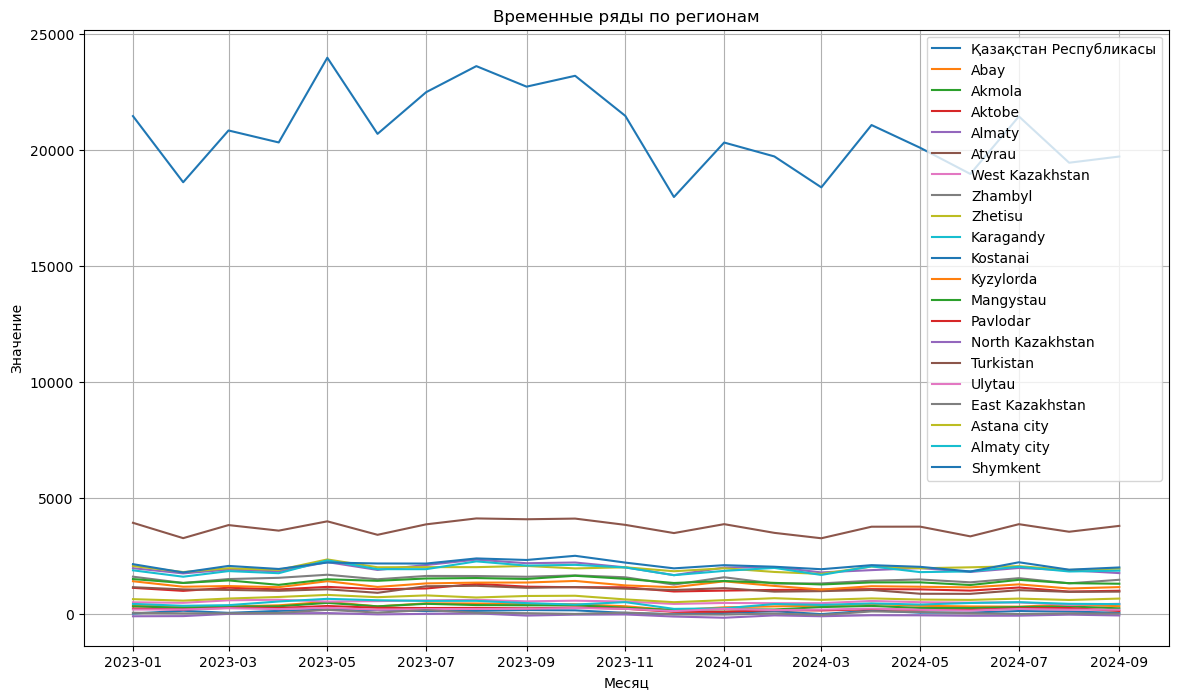

In [27]:
plt.figure(figsize=(14, 8))
for region in df['Region'].unique():
    region_data = df_long[df_long['Region'] == region]
    plt.plot(region_data['Month'], region_data['Value'], label=region)

plt.legend()
plt.title('Временные ряды по регионам')
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.grid()
plt.show()


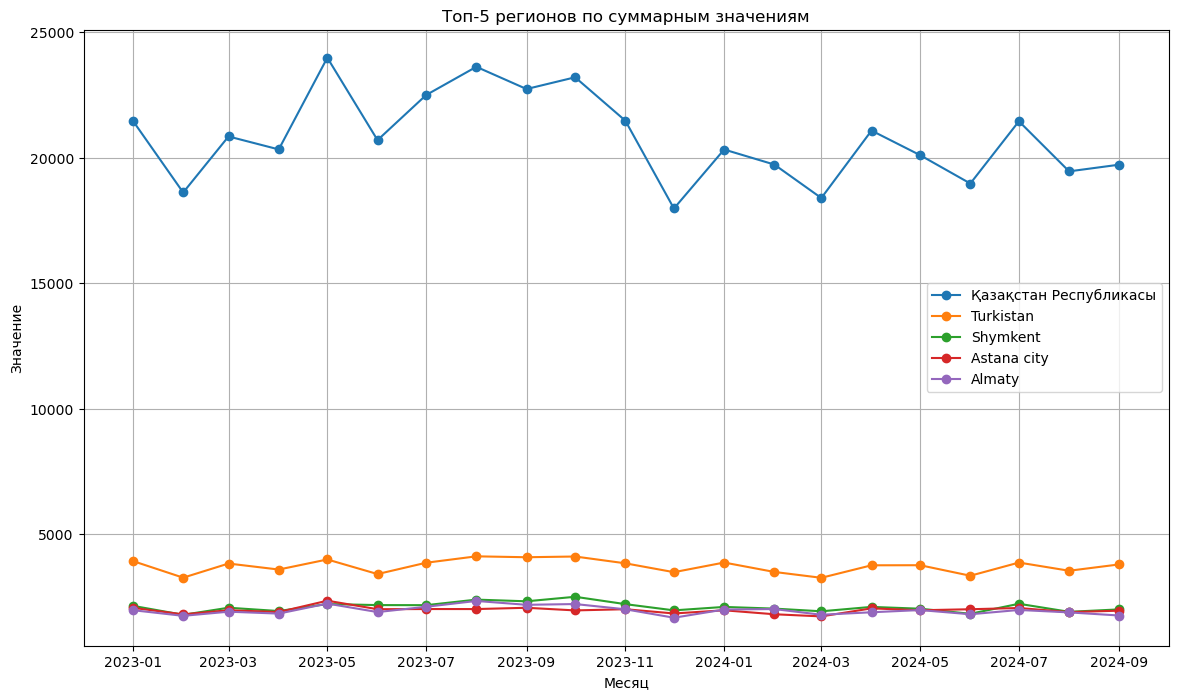

In [29]:
# Находим топ-5 регионов с наибольшими суммарными значениями
top_regions = df.set_index('Region').sum(axis=1).nlargest(5).index

plt.figure(figsize=(14, 8))
for region in top_regions:
    region_data = df_long[df_long['Region'] == region]
    plt.plot(region_data['Month'], region_data['Value'], label=region, marker='o')

plt.legend()
plt.title('Топ-5 регионов по суммарным значениям')
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.grid()
plt.show()


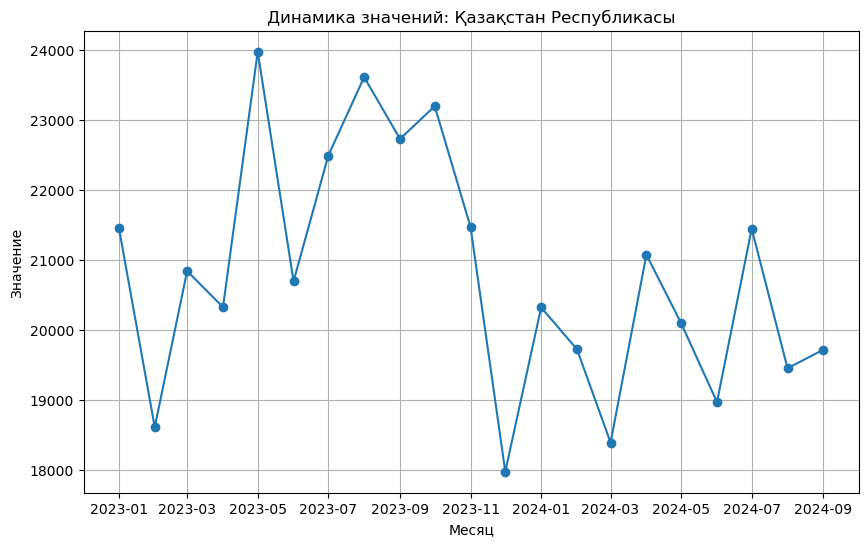

In [31]:
region = 'Қазақстан Республикасы'
region_data = df_long[df_long['Region'] == region]

plt.figure(figsize=(10, 6))
plt.plot(region_data['Month'], region_data['Value'], marker='o')
plt.title(f'Динамика значений: {region}')
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.grid()
plt.show()


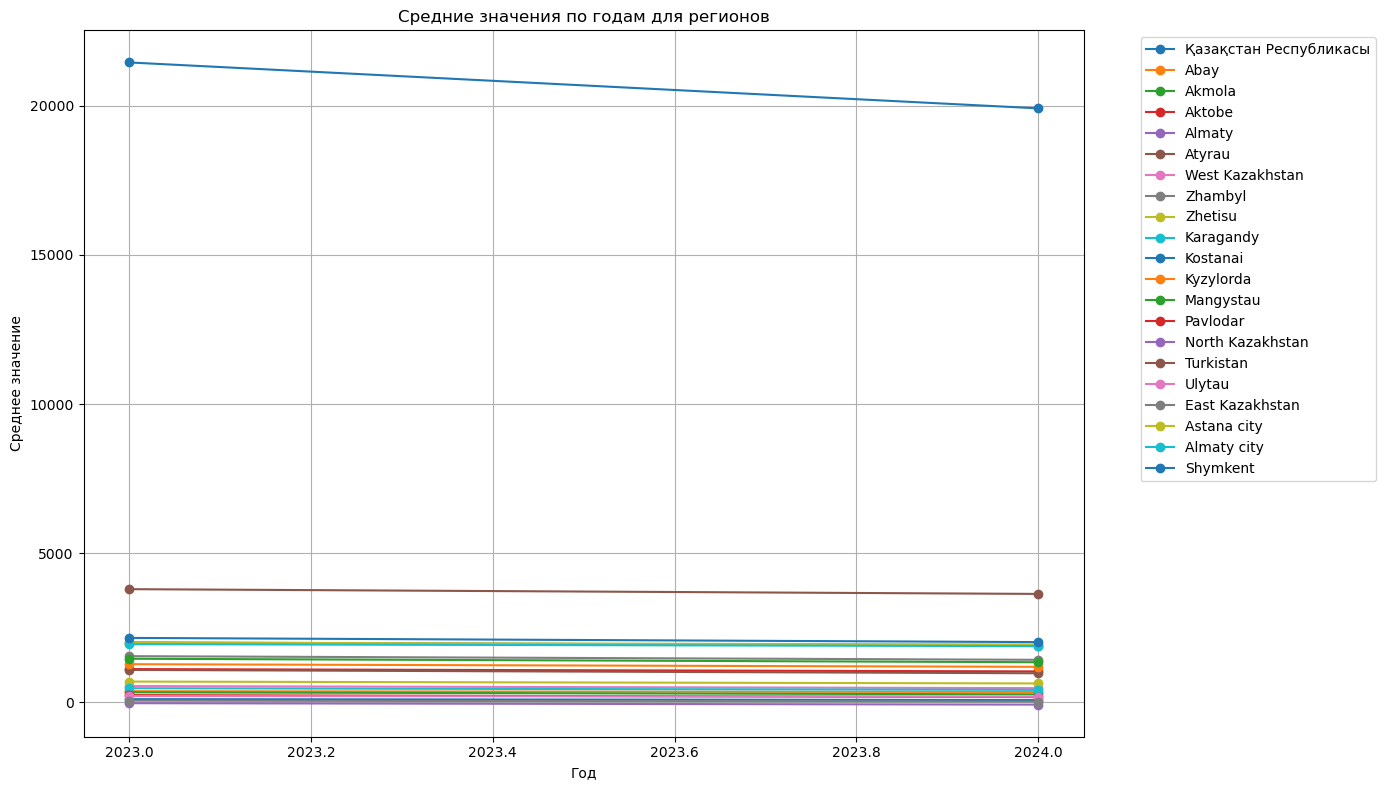

In [37]:
# Добавляем год как отдельную колонку
df_long['Year'] = df_long['Month'].dt.year

# Средние значения по годам и регионам
avg_by_year = df_long.groupby(['Region', 'Year'])['Value'].mean().reset_index()

# Визуализация
plt.figure(figsize=(14, 8))
for region in df['Region'].unique():
    region_data = avg_by_year[avg_by_year['Region'] == region]
    plt.plot(region_data['Year'], region_data['Value'], label=region, marker='o')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Средние значения по годам для регионов')
plt.xlabel('Год')
plt.ylabel('Среднее значение')
plt.grid()
plt.tight_layout()
plt.show()


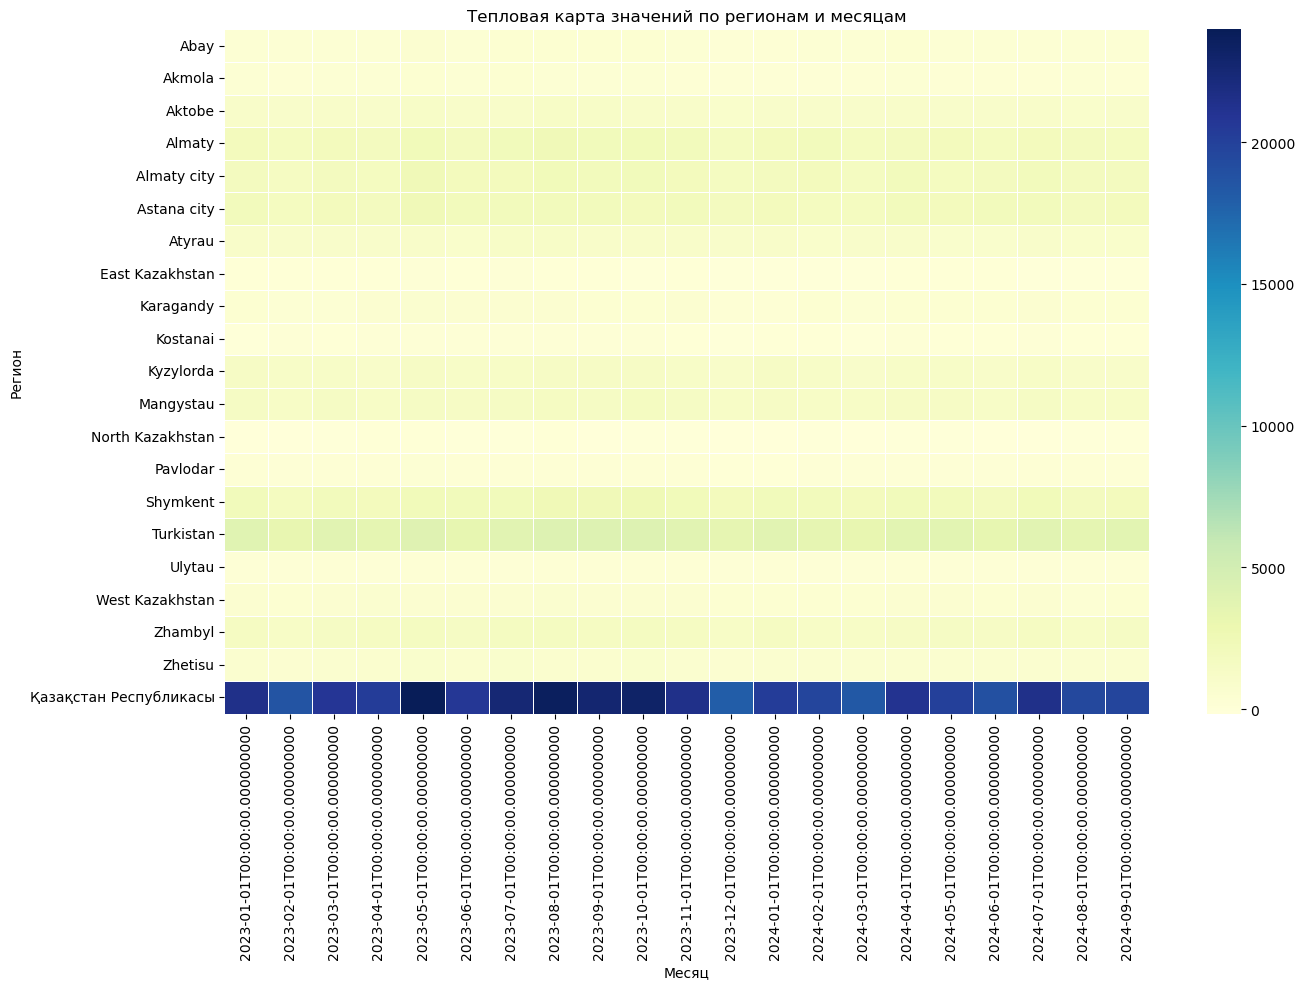

In [39]:
import seaborn as sns

# Создаем сводную таблицу для тепловой карты
heatmap_data = df_long.pivot_table(index='Region', columns='Month', values='Value', aggfunc='mean')

# Построение тепловой карты
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Тепловая карта значений по регионам и месяцам')
plt.xlabel('Месяц')
plt.ylabel('Регион')
plt.tight_layout()
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


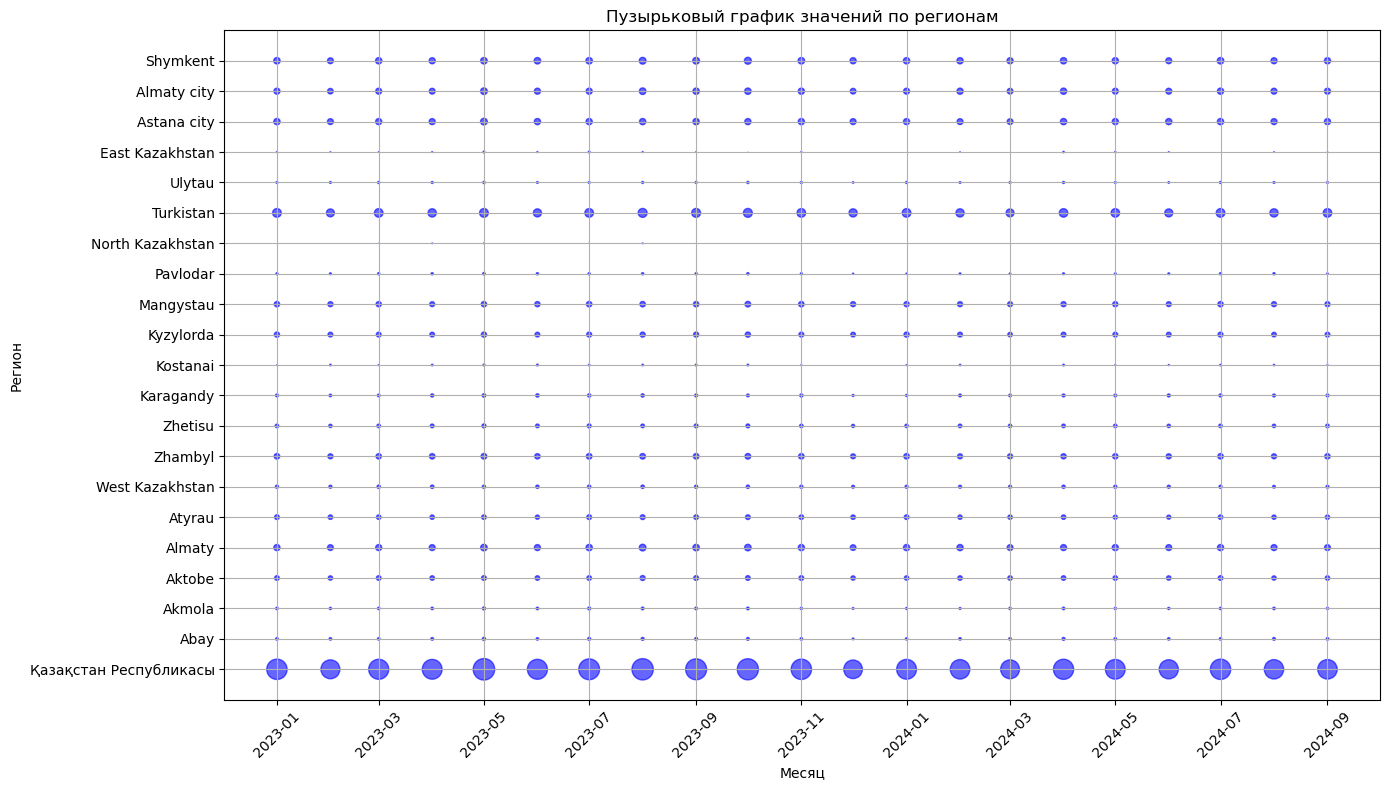

In [41]:
plt.figure(figsize=(14, 8))
bubble_sizes = df_long['Value'] / 100  # Масштабируем размеры пузырей

plt.scatter(df_long['Month'], df_long['Region'], s=bubble_sizes, alpha=0.6, color='blue')
plt.title('Пузырьковый график значений по регионам')
plt.xlabel('Месяц')
plt.ylabel('Регион')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


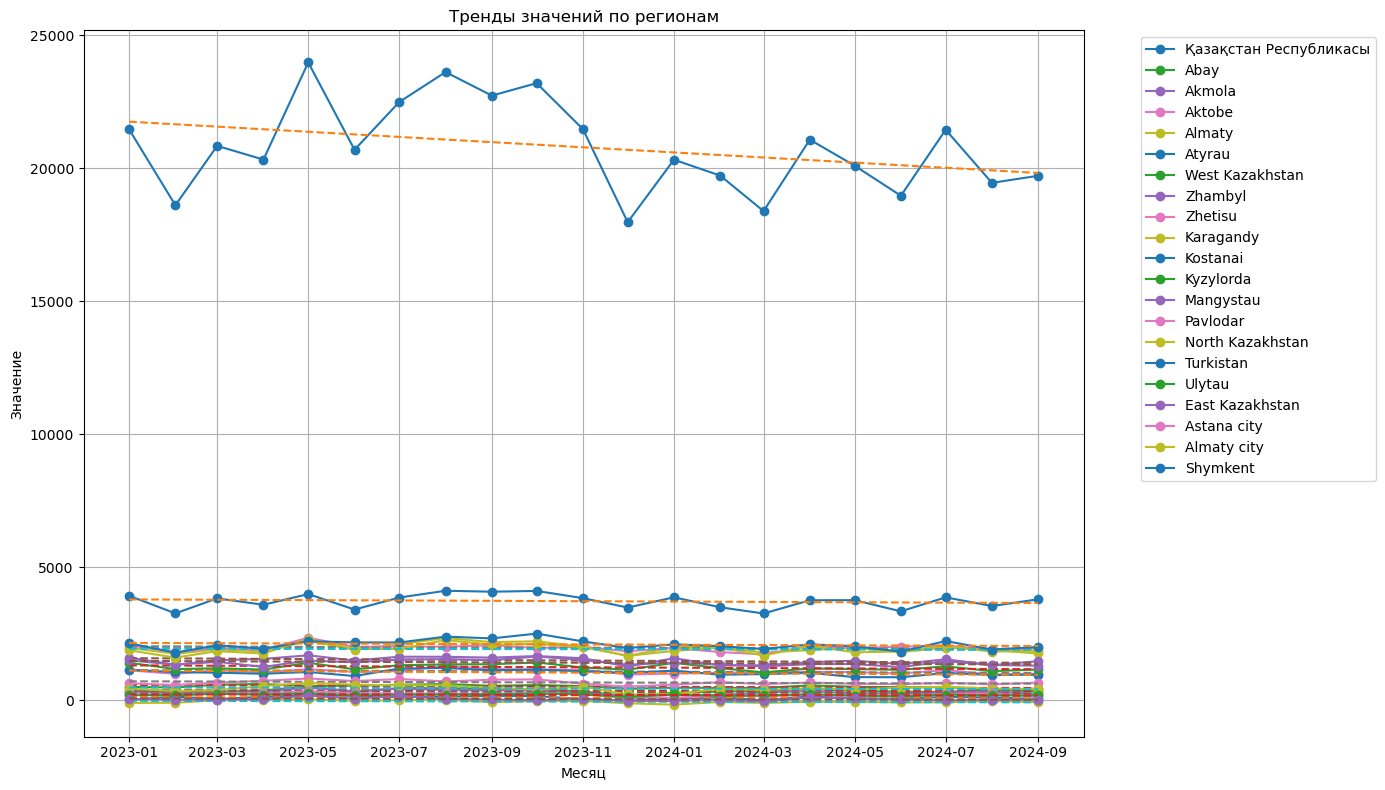

In [43]:
from scipy.stats import linregress

plt.figure(figsize=(14, 8))
for region in df['Region'].unique():
    region_data = df_long[df_long['Region'] == region]
    x = region_data['Month'].map(lambda date: date.toordinal())  # Преобразуем даты в числовые значения
    y = region_data['Value']
    
    # Линейная регрессия
    slope, intercept, _, _, _ = linregress(x, y)
    trend = slope * x + intercept
    
    plt.plot(region_data['Month'], y, label=region, marker='o')
    plt.plot(region_data['Month'], trend, linestyle='--')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Тренды значений по регионам')
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


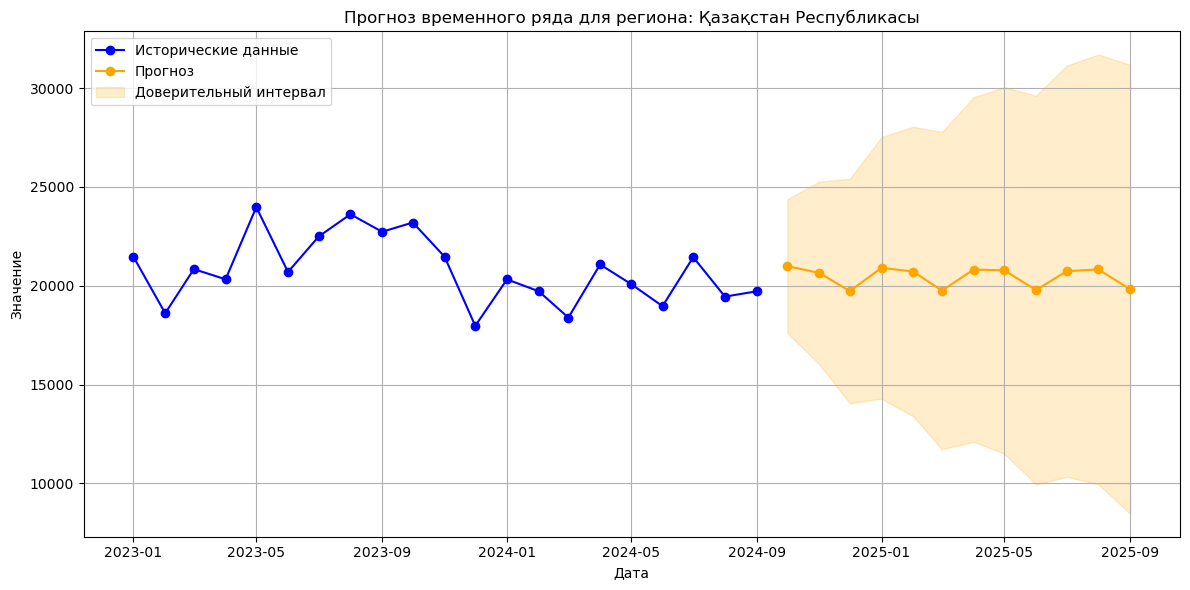

Прогноз на следующие 12 месяцев:
2024-10-01    20991.016262
2024-11-01    20653.420736
2024-12-01    19730.803300
2025-01-01    20904.869396
2025-02-01    20721.065630
2025-03-01    19752.178524
2025-04-01    20819.702378
2025-05-01    20778.536277
2025-06-01    19781.944151
2025-07-01    20736.691455
2025-08-01    20825.897736
2025-09-01    19818.900730
Freq: MS, Name: predicted_mean, dtype: float64


In [49]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Подготовка данных для региона
region_series = df_long[df_long['Region'] == 'Қазақстан Республикасы']
region_series = region_series.set_index('Month')['Value'].dropna()

# Преобразование индекса в формат DateTime и установка частоты (например, месячный интервал)
region_series.index = pd.to_datetime(region_series.index)
region_series = region_series.asfreq('MS')  # Установка частоты как месяц (Start of Month)

# Тестирование параметров модели (можно варьировать order)
p, d, q = 2, 1, 2  # Текущие параметры модели
model = ARIMA(region_series, order=(p, d, q))
model_fit = model.fit(method_kwargs={'maxiter': 1000})  # Увеличиваем количество итераций для улучшения сходимости

# Прогноз на 12 месяцев
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Визуализация
plt.figure(figsize=(12, 6))

# Исторические данные
plt.plot(region_series.index, region_series.values, label='Исторические данные', color='blue', marker='o')

# Прогнозируемые значения
future_index = pd.date_range(start=region_series.index[-1], periods=forecast_steps + 1, freq='MS')[1:]
plt.plot(future_index, forecast_values, label='Прогноз', color='orange', marker='o')

# Доверительный интервал
plt.fill_between(
    future_index, 
    forecast_conf_int.iloc[:, 0],  # Нижняя граница
    forecast_conf_int.iloc[:, 1],  # Верхняя граница
    color='orange', alpha=0.2, label='Доверительный интервал'
)

# Оформление
plt.legend()
plt.title('Прогноз временного ряда для региона: Қазақстан Республикасы')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid()
plt.tight_layout()
plt.show()

# Печать прогноза
print("Прогноз на следующие 12 месяцев:")
print(forecast_values)


C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.



Mean Absolute Error (MAE): 0.40
Root Mean Squared Error (RMSE): 0.54


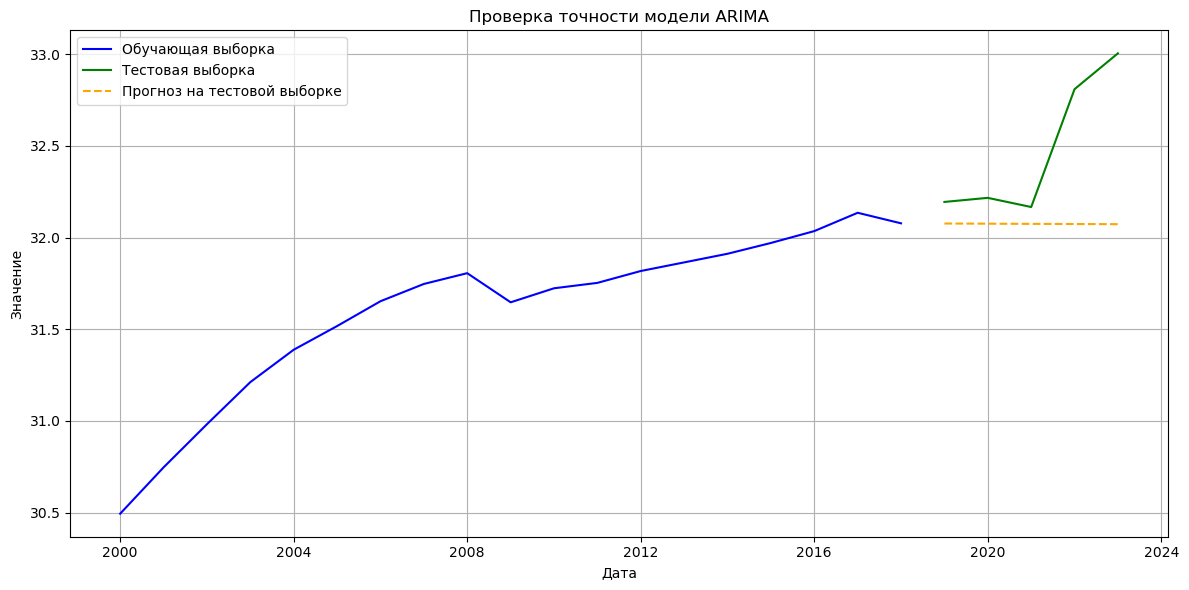

In [306]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(region_series) * 0.8)  # 80% данных для обучения
train, test = region_series[:train_size], region_series[train_size:]

# Создание модели ARIMA для обучающей выборки
model_train = ARIMA(train, order=(p, d, q))
model_fit_train = model_train.fit(method_kwargs={'maxiter': 1000})

# Прогноз для тестовой выборки
forecast_test = model_fit_train.get_forecast(steps=len(test))
forecast_test_values = forecast_test.predicted_mean

# Расчет метрик
mae = mean_absolute_error(test, forecast_test_values)
rmse = np.sqrt(mean_squared_error(test, forecast_test_values))

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Визуализация обучающих, тестовых данных и прогноза
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Обучающая выборка', color='blue')
plt.plot(test.index, test, label='Тестовая выборка', color='green')
plt.plot(test.index, forecast_test_values, label='Прогноз на тестовой выборке', color='orange', linestyle='--')
plt.legend()
plt.title('Проверка точности модели ARIMA')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid()
plt.tight_layout()
plt.show()


In [71]:
import pandas as pd

# Загрузим данные из нового Excel файла
file_path = '4.xlsx'  # Укажите путь к новому файлу
df = pd.read_excel(file_path, sheet_name='Лист1')  # Убедитесь, что используете правильное имя листа

# Просмотр первых нескольких строк данных для анализа структуры
print(df.head())

# Удаляем пустые строки и столбцы
df_cleaned = df.dropna(how='all', axis=0)  # Удалим строки, в которых все значения NaN
df_cleaned = df_cleaned.dropna(how='all', axis=1)  # Удалим столбцы, в которых все значения NaN

# Просмотр очищенных данных
print(df_cleaned.head())

# Фильтруем строки, которые содержат метаинформацию, например, по ключевым словам
# Это зависит от вашего контента, например, если строка начинается с "көрсеткіш", мы можем ее исключить
df_filtered = df_cleaned[~df_cleaned['Unnamed: 1'].str.contains('көрсеткіш', na=False)]

# Пример: если столбцы с данными о населении и годах содержат "Год" и "Население"
# Проверьте, что столбцы корректно именованы, и выберите нужные
df_population = df_filtered[['Год', 'Население']]  # Замените на правильные имена столбцов

# Преобразуем год в datetime формат для удобства анализа
df_population['Год'] = pd.to_datetime(df_population['Год'], format='%Y')

# Просмотр очищенных данных
print(df_population.head())


                   Регион    2000 жыл    2001 жыл    2002 жыл    2003 жыл  \
0  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ  14.901.641  14.865.610  14.851.059  14.866.837   
1           АҚМОЛА ОБЛЫСЫ     799.179     776.377     755.000     748.167   
2           АҚТӨБЕ ОБЛЫСЫ     677.715     670.231     668.166     668.378   
3           АЛМАТЫ ОБЛЫСЫ   1.557.141   1.554.320   1.554.573   1.560.267   
4           АТЫРАУ ОБЛЫСЫ     441.692     443.630     447.634     451.928   

     2004 жыл    2005 жыл    2006 жыл    2007 жыл    2008 жыл  ...  \
0  14.951.200  15.074.767  15.219.291  15.396.878  15.571.506  ...   
1     748.930     747.185     746.652     748.559     747.447  ...   
2     671.812     678.607     686.698     695.454     703.660  ...   
3   1.571.194   1.589.751   1.603.758   1.620.696   1.643.278  ...   
4     457.215     463.466     472.384     480.687     490.369  ...   

     2015 жыл    2016 жыл    2017 жыл    2018 жыл    2019 жыл    2020 жыл  \
0  17.415.715  17.669.896  17.918.214  

KeyError: 'Unnamed: 1'

In [79]:
import pandas as pd

# Путь к файлу
file_path = '4.xlsx'  # Укажите путь к новому файлу

# Считываем имена листов в файле
excel_file = pd.ExcelFile(file_path)
print(excel_file.sheet_names)  # Выведем имена всех листов в файле

# Теперь используем правильное имя листа
df = pd.read_excel(file_path, sheet_name='Лист1')  # Замените на имя листа, которое вы нашли
print(df.head())


['Лист1']
                   Регион    2000 жыл    2001 жыл    2002 жыл    2003 жыл  \
0  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ  14.901.641  14.865.610  14.851.059  14.866.837   
1           АҚМОЛА ОБЛЫСЫ     799.179     776.377     755.000     748.167   
2           АҚТӨБЕ ОБЛЫСЫ     677.715     670.231     668.166     668.378   
3           АЛМАТЫ ОБЛЫСЫ   1.557.141   1.554.320   1.554.573   1.560.267   
4           АТЫРАУ ОБЛЫСЫ     441.692     443.630     447.634     451.928   

     2004 жыл    2005 жыл    2006 жыл    2007 жыл    2008 жыл  ...  \
0  14.951.200  15.074.767  15.219.291  15.396.878  15.571.506  ...   
1     748.930     747.185     746.652     748.559     747.447  ...   
2     671.812     678.607     686.698     695.454     703.660  ...   
3   1.571.194   1.589.751   1.603.758   1.620.696   1.643.278  ...   
4     457.215     463.466     472.384     480.687     490.369  ...   

     2015 жыл    2016 жыл    2017 жыл    2018 жыл    2019 жыл    2020 жыл  \
0  17.415.715  17.669.896  17

In [95]:
import pandas as pd

# Загружаем данные из Excel
df = pd.read_excel('4.xlsx')

# Убираем первый столбец, который содержит регионы
df.set_index('Регион', inplace=True)

# Транспонируем таблицу, чтобы года стали строками
df_transposed = df.T

# Преобразуем в длинный формат с помощью melt
df_processed = df_transposed.reset_index().melt(id_vars=['index'], var_name='Year', value_name='Population')

# Переименуем столбцы для удобства
df_processed.rename(columns={'index': 'Region'}, inplace=True)

# Убедимся, что население это число, удаляя точки и преобразуем в формат float
df_processed['Population'] = df_processed['Population'].str.replace('.', '').astype(float)

# Просмотр первых строк результата
print(df_processed.head())


     Region                    Year  Population
0  2000 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ  14901641.0
1  2001 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ  14865610.0
2  2002 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ  14851059.0
3  2003 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ  14866837.0
4  2004 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ  14951200.0


In [97]:
# Рассчитаем основные статистики для населения
population_stats = df_processed['Population'].describe()

# Печать статистики
print(population_stats)


count    4.410000e+02
mean     1.911301e+06
std      3.723475e+06
min      2.209130e+05
25%      6.683780e+05
50%      8.356860e+05
75%      1.384810e+06
max      2.003384e+07
Name: Population, dtype: float64


In [99]:
# Рассчитаем разницу в населении между годами
df_processed['Population Change'] = df_processed.groupby('Region')['Population'].diff()

# Посмотрим, как изменялось население за год по регионам
population_change = df_processed.groupby('Region')['Population Change'].mean()

# Печать изменения населения по регионам
print(population_change)


Region
2000 жыл   -8.607001e+05
2001 жыл   -8.585532e+05
2002 жыл   -8.574147e+05
2003 жыл   -8.573248e+05
2004 жыл   -8.609995e+05
2005 жыл   -8.665801e+05
2006 жыл   -8.732122e+05
2007 жыл   -8.818520e+05
2008 жыл   -8.904229e+05
2009 жыл   -9.137808e+05
2010 жыл   -9.257915e+05
2011 жыл   -9.392074e+05
2012 жыл   -9.515354e+05
2013 жыл   -9.647123e+05
2014 жыл   -9.783722e+05
2015 жыл   -9.858919e+05
2016 жыл   -9.979456e+05
2017 жыл   -1.010432e+06
2018 жыл   -1.017178e+06
2019 жыл   -1.030453e+06
2020 жыл   -1.041820e+06
2021 жыл   -1.054141e+06
2022 жыл   -9.948354e+05
2023 жыл   -1.007602e+06
2024 жыл   -1.020703e+06
Name: Population Change, dtype: float64


In [103]:
# Проверим, где наблюдаются резкие изменения
anomalies = df_processed[df_processed['Population Change'].abs() > 1000000]  # Пример для изменения более чем на миллион

print(anomalies)


       Region                  Year  Population  Population Change
25   2000 жыл         АҚМОЛА ОБЛЫСЫ    799179.0        -14102462.0
26   2001 жыл         АҚМОЛА ОБЛЫСЫ    776377.0        -14089233.0
27   2002 жыл         АҚМОЛА ОБЛЫСЫ    755000.0        -14096059.0
28   2003 жыл         АҚМОЛА ОБЛЫСЫ    748167.0        -14118670.0
29   2004 жыл         АҚМОЛА ОБЛЫСЫ    748930.0        -14202270.0
..        ...                   ...         ...                ...
449  2024 жыл        ШЫМКЕНТ ҚАЛАСЫ   1222066.0         -1006611.0
468  2018 жыл      ТҮРКІСТАН ОБЛЫСЫ   1977028.0          1024859.0
497  2022 жыл         ЖЕТІСУ ОБЛЫСЫ    698757.0         -1389753.0
498  2023 жыл         ЖЕТІСУ ОБЛЫСЫ    698726.0         -1420500.0
499  2024 жыл         ЖЕТІСУ ОБЛЫСЫ    697987.0         -1444185.0

[103 rows x 4 columns]


In [105]:
# Рассчитаем процентное изменение населения
df_processed['Population Growth (%)'] = df_processed.groupby('Region')['Population'].pct_change() * 100

# Посмотрим на процентное изменение
growth_percentage = df_processed.groupby('Region')['Population Growth (%)'].mean()
print(growth_percentage)


Region
2000 жыл    32.074500
2001 жыл    30.774757
2002 жыл    29.357989
2003 жыл    28.950493
2004 жыл    28.660305
2005 жыл    28.291207
2006 жыл    27.771426
2007 жыл    27.155126
2008 жыл    26.564599
2009 жыл    25.236454
2010 жыл    24.577771
2011 жыл    23.927381
2012 жыл    23.501104
2013 жыл    23.150861
2014 жыл    22.890310
2015 жыл    22.750374
2016 жыл    22.688409
2017 жыл    22.274825
2018 жыл    12.839162
2019 жыл    12.356557
2020 жыл    12.219971
2021 жыл    12.121230
2022 жыл     8.886669
2023 жыл     9.007773
2024 жыл     9.156732
Name: Population Growth (%), dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_7440\1196338342.py:2: FutureWarning:

The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [115]:
import pandas as pd

# Загружаем данные из Excel
df = pd.read_excel('4.xlsx')

# Убираем первый столбец (с регионом) и устанавливаем его как индекс
df.set_index('Регион', inplace=True)

# Преобразуем таблицу в длинный формат (melt)
df_long = df.reset_index().melt(id_vars=['Регион'], var_name='Year', value_name='Population')

# Убираем текст "жыл" в колонке Year и преобразуем его в целое число
df_long['Year'] = df_long['Year'].str.replace(' жыл', '').astype(int)

# Убираем точки из чисел в колонке Population и преобразуем в float
df_long['Population'] = df_long['Population'].str.replace('.', '').astype(float)

# Проверим результат
print(df_long.head())


                   Регион  Year  Population
0  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ  2000  14901641.0
1           АҚМОЛА ОБЛЫСЫ  2000    799179.0
2           АҚТӨБЕ ОБЛЫСЫ  2000    677715.0
3           АЛМАТЫ ОБЛЫСЫ  2000   1557141.0
4           АТЫРАУ ОБЛЫСЫ  2000    441692.0


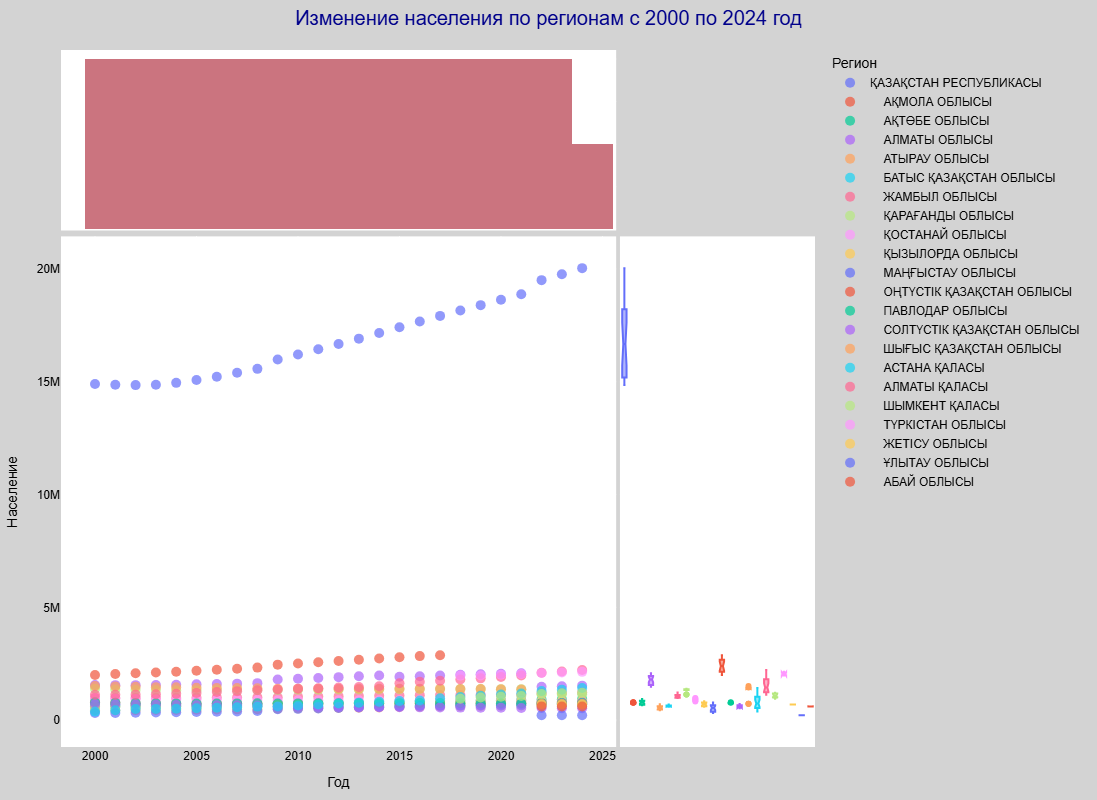

In [125]:
import plotly.express as px

# Создаем график с маргинальными гистограммами
fig = px.scatter(df_long, 
                 x='Year', 
                 y='Population', 
                 color='Регион',  # Мы добавим цветовую дифференциацию по регионам
                 marginal_x='histogram',  # Гистограмма на оси X
                 marginal_y='box',  # Ящик с усами (box plot) на оси Y
                 title='Население по регионам и годам',
                 labels={'Year': 'Год', 'Population': 'Население'},
                 hover_data=['Регион'])  # Показываем регион при наведении

# Обновляем внешний вид графика для улучшения восприятия
fig.update_layout(
    title={
        'text': "Изменение населения по регионам с 2000 по 2024 год",  # Измененный заголовок
        'x': 0.5,  # Центрирование заголовка
        'xanchor': 'center',  # Центрирование заголовка
        'font': {'size': 20, 'family': 'Arial', 'color': 'darkblue'}
    },
    xaxis_title="Год",  # Подпись для оси X
    yaxis_title="Население",  # Подпись для оси Y
    plot_bgcolor='white',  # Белый фон для графика
    paper_bgcolor='lightgray',  # Светлый фон для бумаги
    legend_title="Регион",  # Название для легенды
    font=dict(size=12, family='Arial', color='black'),  # Размер и шрифт для текста
    width=1000,  # Ширина графика
    height=800,  # Высота графика
    margin=dict(t=50, b=50, l=50, r=50)  # Отступы для графика
)

# Дополнительное улучшение: увеличим размеры маргинальных графиков
fig.update_traces(marker=dict(size=10, opacity=0.7),
                  selector=dict(mode='markers'))

# Покажем график
fig.show()


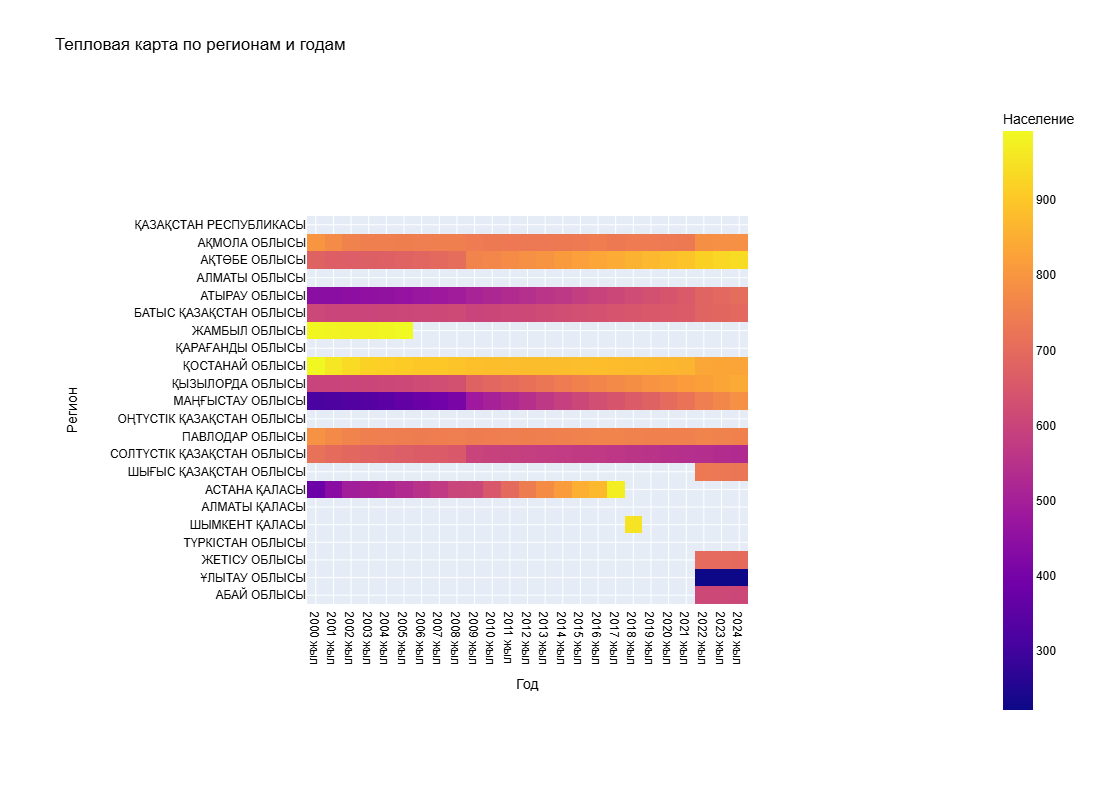

In [131]:
import pandas as pd
import plotly.express as px

# Загружаем данные из Excel
df = pd.read_excel('4.xlsx')

# Преобразуем данные, убрав первый столбец (названия регионов)
df.set_index('Регион', inplace=True)

# Создаем тепловую карту
fig = px.imshow(df,
                labels=dict(x="Год", y="Регион", color="Население"),
                x=df.columns,
                y=df.index,
                title="Тепловая карта населения по регионам и годам")

# Настройки графика
fig.update_layout(
    title="Тепловая карта по регионам и годам",
    width=800,  # Ширина
    height=800,  # Высота
    font=dict(size=12, family="Arial", color="black")
)

# Покажем график
fig.show()


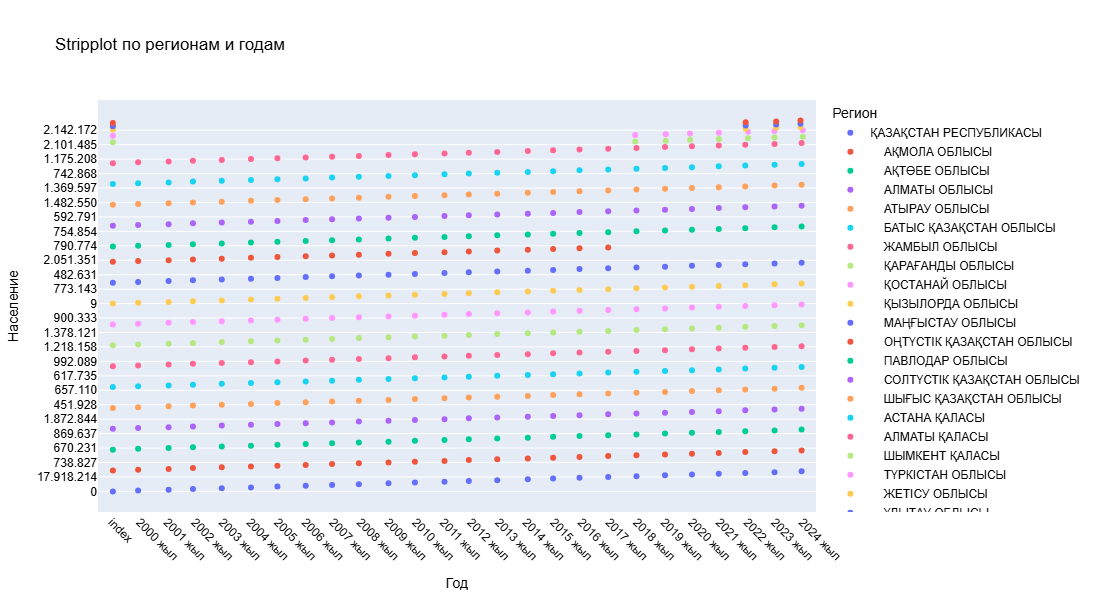

In [135]:

import pandas as pd
import plotly.express as px

# Загружаем данные из Excel
df = pd.read_excel('4.xlsx')

# Преобразуем данные в длинный формат
df_long = df.reset_index().melt(id_vars=['Регион'], var_name='Year', value_name='Population')

# Создаем Stripplot
fig = px.strip(df_long, 
               x='Year',  # Ось X - года
               y='Population',  # Ось Y - население
               color='Регион',  # Разделение по регионам
               title="Stripplot: Население по регионам и годам",
               labels={'Year': 'Год', 'Population': 'Население'},
               stripmode='overlay')  # Оверлей для наложения точек

# Настроим график
fig.update_layout(
    title="Stripplot по регионам и годам",
    width=1000,  # Ширина графика
    height=600,  # Высота графика
    xaxis=dict(tickangle=45),  # Поворот подписей на оси X
    font=dict(size=12, family="Arial", color="black")
)

# Покажем график
fig.show()


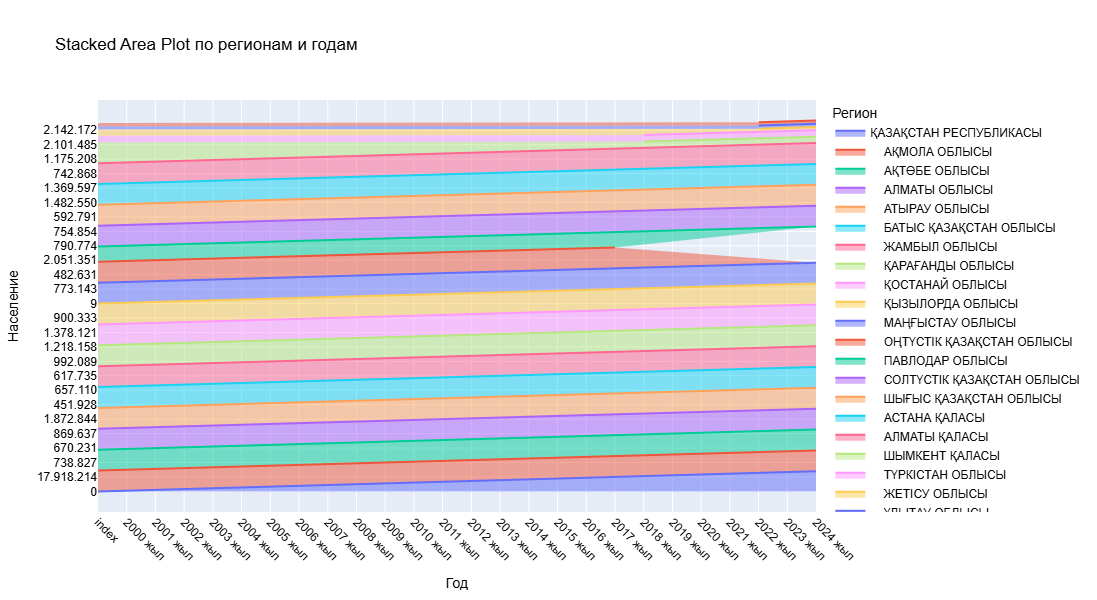

In [147]:
import pandas as pd
import plotly.express as px

# Загружаем данные из Excel
df = pd.read_excel('4.xlsx')

# Преобразуем данные в длинный формат
df_long = df.reset_index().melt(id_vars=['Регион'], var_name='Year', value_name='Population')

# Преобразуем данные в формат, который поможет сделать stacked plot
fig = px.area(df_long, 
              x='Year', 
              y='Population', 
              color='Регион', 
              title="Stacked Area Plot: Население по регионам и годам",
              labels={'Year': 'Год', 'Population': 'Население'},
              hover_data=['Регион', 'Year', 'Population'])

# Настроим график
fig.update_layout(
    title="Stacked Area Plot по регионам и годам",
    width=1000,  # Ширина графика
    height=600,  # Высота графика
    xaxis=dict(tickangle=45),  # Поворот подписей на оси X
    font=dict(size=12, family="Arial", color="black"),
    barmode='stack'  # Стековый режим
)

# Покажем график
fig.show()


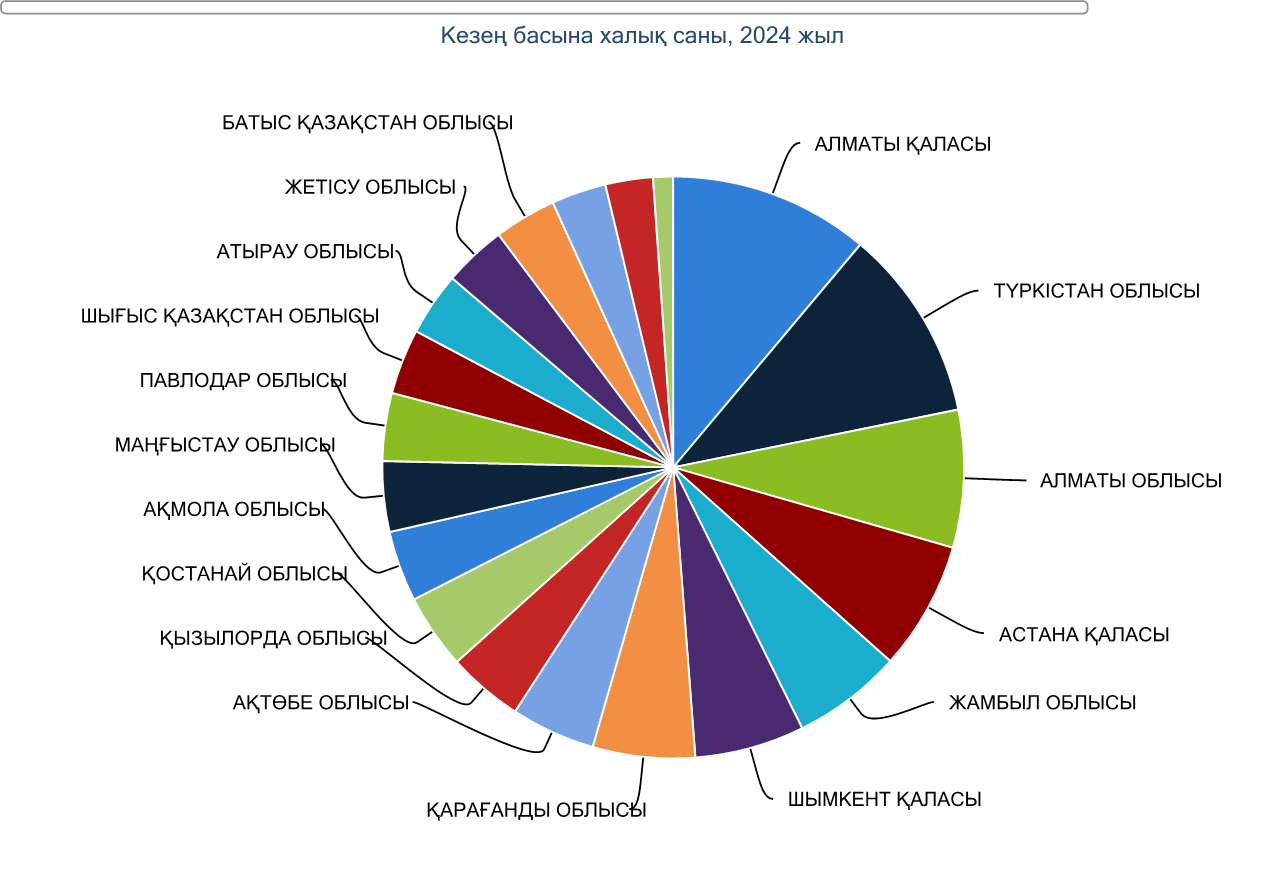

In [151]:
from IPython.display import Image

# Замените путь на путь к вашему изображению
img_path = "C:\\Users\\Asus\\Downloads\\Кезең басына халық саны.png"  # Укажите путь к файлу на вашем компьютере
Image(filename=img_path)


In [153]:

import pandas as pd

# Загрузите данные из Excel (замените 'your_file.xlsx' на имя вашего файла)
df = pd.read_excel('5.xlsx')

# Посмотрим на структуру данных
print(df.head())


                   Регион  2000 жыл  2001 жыл  2002 жыл  2003 жыл  2004 жыл  \
0  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ      30.6      30.8      31.0      31.2      31.4   
1           АҚМОЛА ОБЛЫСЫ      32.1      32.4      32.6      32.8      33.0   
2           АҚТӨБЕ ОБЛЫСЫ      29.5      29.7      30.0      30.2      30.4   
3           АЛМАТЫ ОБЛЫСЫ      29.6      29.9      30.1      30.4      30.6   
4           АТЫРАУ ОБЛЫСЫ      27.8      28.0      28.3      28.5      28.6   

   2005 жыл  2006 жыл  2007 жыл  2008 жыл  ...  2014 жыл  2015 жыл  2016 жыл  \
0      31.5      31.6      31.7      31.7  ...      31.5      31.6      31.6   
1      33.1      33.3      33.4      33.5  ...      34.3      34.5      34.6   
2      30.5      30.6      30.7      30.8  ...      31.0      31.1      31.1   
3      30.7      30.9      31.0      31.1  ...      30.8      30.7      30.8   
4      28.7      28.8      28.9      28.9  ...      28.9      28.9      28.9   

   2017 жыл  2018 жыл  2019 жыл  2020 жыл  2

In [155]:
# Транспонировать таблицу, чтобы годы стали строками
df_transposed = df.set_index('Регион').T

# Просмотрим результат
print(df_transposed.head())


Регион    ҚАЗАҚСТАН РЕСПУБЛИКАСЫ      АҚМОЛА ОБЛЫСЫ      АҚТӨБЕ ОБЛЫСЫ  \
2000 жыл                    30.6               32.1               29.5   
2001 жыл                    30.8               32.4               29.7   
2002 жыл                    31.0               32.6               30.0   
2003 жыл                    31.2               32.8               30.2   
2004 жыл                    31.4               33.0               30.4   

Регион        АЛМАТЫ ОБЛЫСЫ      АТЫРАУ ОБЛЫСЫ      БАТЫС ҚАЗАҚСТАН ОБЛЫСЫ  \
2000 жыл               29.6               27.8                        31.2   
2001 жыл               29.9               28.0                        31.5   
2002 жыл               30.1               28.3                        31.7   
2003 жыл               30.4               28.5                        32.0   
2004 жыл               30.6               28.6                        32.1   

Регион        ЖАМБЫЛ ОБЛЫСЫ      ҚАРАҒАНДЫ ОБЛЫСЫ      ҚОСТАНАЙ ОБЛЫСЫ  \
2000 жыл    

In [157]:
# Преобразуем данные в длинный формат
df_processed = df_transposed.reset_index().melt(id_vars=['index'], var_name='Year', value_name='Average Age')

# Переименуем столбцы для удобства
df_processed.rename(columns={'index': 'Region'}, inplace=True)

# Проверим результат
print(df_processed.head())


     Region                    Year  Average Age
0  2000 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ         30.6
1  2001 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ         30.8
2  2002 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ         31.0
3  2003 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ         31.2
4  2004 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ         31.4


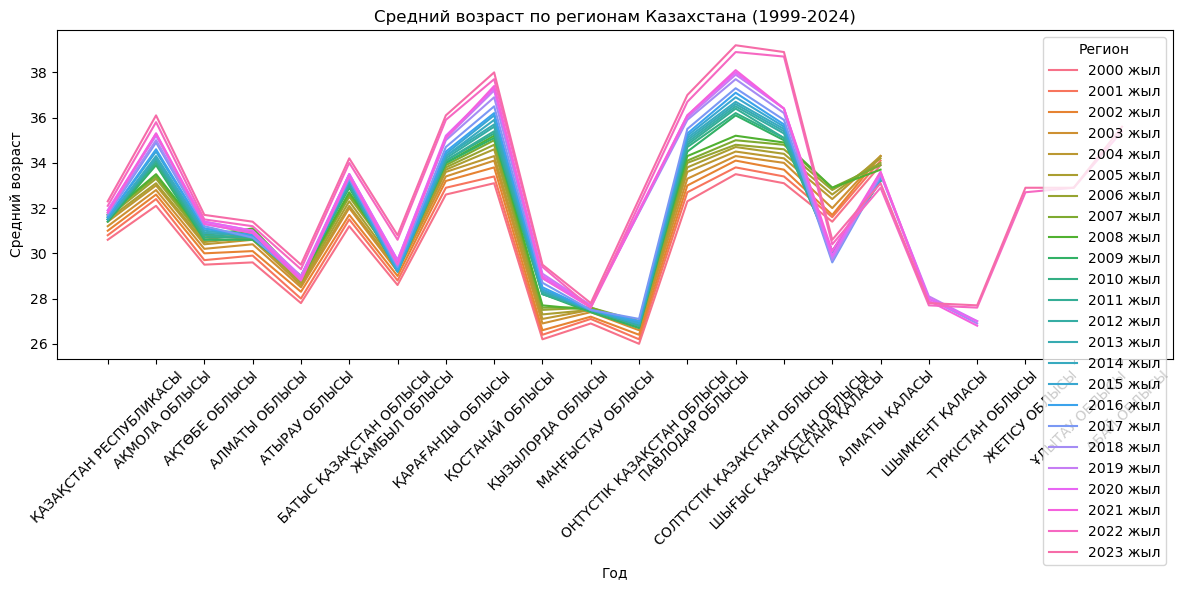

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# График изменения среднего возраста по регионам
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_processed, x='Year', y='Average Age', hue='Region')
plt.title('Средний возраст по регионам Казахстана (1999-2024)')
plt.xlabel('Год')
plt.ylabel('Средний возраст')
plt.xticks(rotation=45)
plt.legend(title='Регион')
plt.tight_layout()
plt.show()


In [219]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

# Загрузите данные из Excel
df = pd.read_excel('5.xlsx')

# Посмотрим на структуру данных
print(df.head())

# Транспонируем таблицу, чтобы годы стали строками
df_transposed = df.set_index('Регион').T

# Преобразуем данные в длинный формат
df_processed = df_transposed.reset_index().melt(id_vars=['index'], var_name='Year', value_name='Average Age')

# Переименуем столбцы для удобства
df_processed.rename(columns={'index': 'Region'}, inplace=True)

# Проверим результат
print(df_processed.head())


                   Регион  2000 жыл  2001 жыл  2002 жыл  2003 жыл  2004 жыл  \
0  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ      30.6      30.8      31.0      31.2      31.4   
1           АҚМОЛА ОБЛЫСЫ      32.1      32.4      32.6      32.8      33.0   
2           АҚТӨБЕ ОБЛЫСЫ      29.5      29.7      30.0      30.2      30.4   
3           АЛМАТЫ ОБЛЫСЫ      29.6      29.9      30.1      30.4      30.6   
4           АТЫРАУ ОБЛЫСЫ      27.8      28.0      28.3      28.5      28.6   

   2005 жыл  2006 жыл  2007 жыл  2008 жыл  ...  2014 жыл  2015 жыл  2016 жыл  \
0      31.5      31.6      31.7      31.7  ...      31.5      31.6      31.6   
1      33.1      33.3      33.4      33.5  ...      34.3      34.5      34.6   
2      30.5      30.6      30.7      30.8  ...      31.0      31.1      31.1   
3      30.7      30.9      31.0      31.1  ...      30.8      30.7      30.8   
4      28.7      28.8      28.9      28.9  ...      28.9      28.9      28.9   

   2017 жыл  2018 жыл  2019 жыл  2020 жыл  2

In [241]:
print(df.columns)


Index(['Регион', '2000 жыл', '2001 жыл', '2002 жыл', '2003 жыл', '2004 жыл',
       '2005 жыл', '2006 жыл', '2007 жыл', '2008 жыл', '2009 жыл', '2010 жыл',
       '2011 жыл', '2012 жыл', '2013 жыл', '2014 жыл', '2015 жыл', '2016 жыл',
       '2017 жыл', '2018 жыл', '2019 жыл', '2020 жыл', '2021 жыл', '2022 жыл',
       '2023 жыл'],
      dtype='object')


In [253]:
print(df_processed.columns)  # Список всех столбцов
print(df_processed.head())  # Показать первые несколько строк



Index(['index', 'Year', 'Average Age'], dtype='object')
      index                    Year  Average Age
0  2000 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ         30.6
1  2001 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ         30.8
2  2002 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ         31.0
3  2003 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ         31.2
4  2004 жыл  ҚАЗАҚСТАН РЕСПУБЛИКАСЫ         31.4


C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Asus\AppData\Local\Temp\ipykernel_7440\1533686699.py:44: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



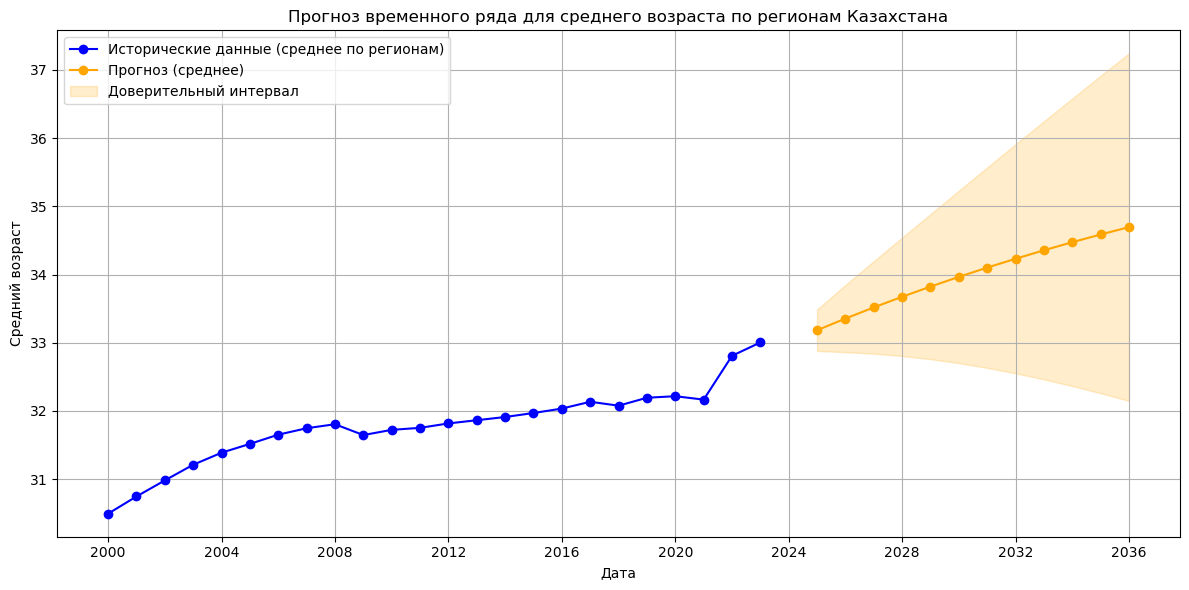

In [261]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Предположим, что у вас есть DataFrame с данными для нескольких областей
# Примерный формат df: (region_data - это DataFrame с данными для разных областей)

# df_processed должен содержать следующие столбцы:
# - 'index': Название региона или области
# - 'Year': Год
# - 'Average Age': Средний возраст для каждого региона за год

# Преобразуем столбец 'Year' в числовой формат, если это еще не сделано
df_processed['Year'] = df_processed['index'].str.extract(r'(\d{4})').astype(int)

# Преобразуем данные в временной ряд с индексом в формате DateTime
df_processed['Year'] = pd.to_datetime(df_processed['Year'], format='%Y')
df_processed.set_index('Year', inplace=True)

# Группируем данные по годам и вычисляем среднее значение для всех областей
average_age_per_year = df_processed.groupby('Year')['Average Age'].mean()

# Создаем временной ряд для средних значений
region_series = average_age_per_year

# Настройка модели ARIMA
p, d, q = 1, 1, 1  # Пример параметров модели
model = ARIMA(region_series, order=(p, d, q))
model_fit = model.fit()

# Прогноз на 12 месяцев вперед (например, на 12 лет вперед)
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Визуализация
plt.figure(figsize=(12, 6))

# Исторические данные
plt.plot(region_series.index, region_series.values, label='Исторические данные (среднее по регионам)', color='blue', marker='o')

# Прогнозируемые значения
future_index = pd.date_range(start=region_series.index[-1], periods=forecast_steps + 1, freq='Y')[1:]
plt.plot(future_index, forecast_values, label='Прогноз (среднее)', color='orange', marker='o')

# Доверительный интервал
plt.fill_between(
    future_index, 
    forecast_conf_int.iloc[:, 0],  # Нижняя граница
    forecast_conf_int.iloc[:, 1],  # Верхняя граница
    color='orange', alpha=0.2, label='Доверительный интервал'
)

# Оформление графика
plt.legend()
plt.title('Прогноз временного ряда для среднего возраста по регионам Казахстана')
plt.xlabel('Дата')
plt.ylabel('Средний возраст')
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



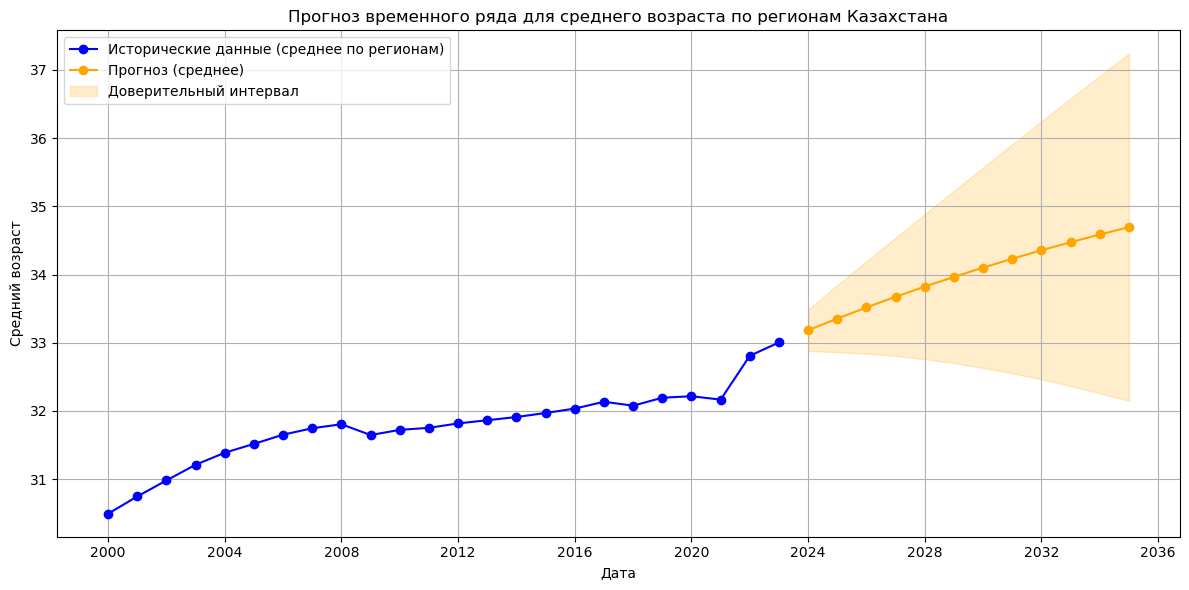

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No freque

Mean Absolute Error (MAE): 0.11
Root Mean Squared Error (RMSE): 0.22


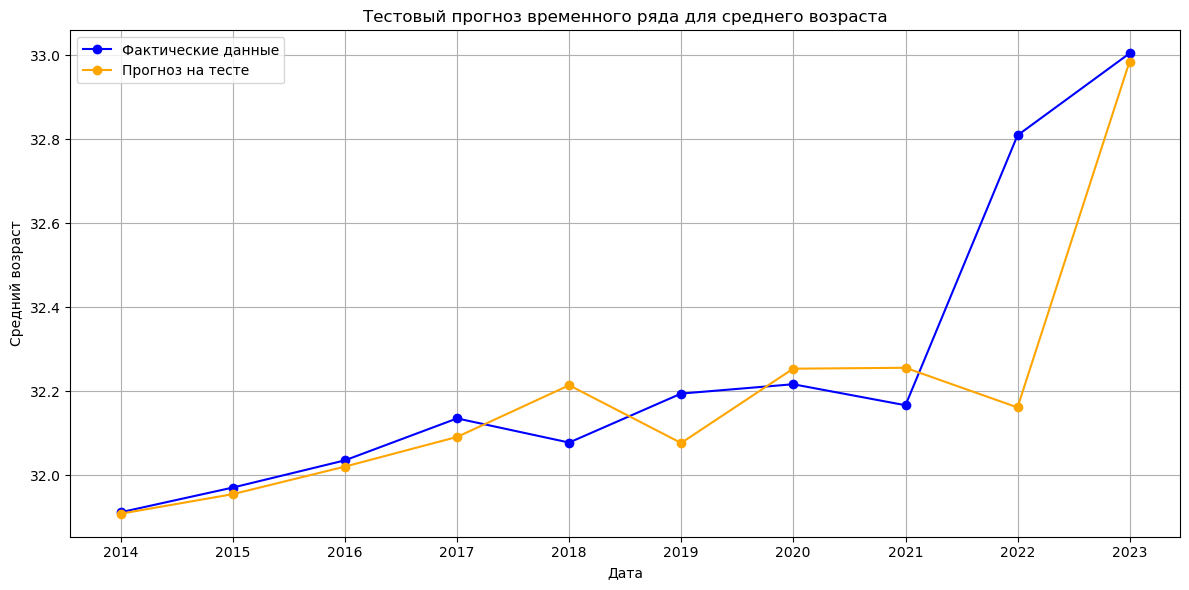

In [312]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Преобразуем столбец 'Year' в числовой формат, если это еще не сделано
df_processed['Year'] = df_processed['index'].str.extract(r'(\d{4})').astype(int)

# Преобразуем данные в временной ряд с индексом в формате DateTime
df_processed['Year'] = pd.to_datetime(df_processed['Year'], format='%Y')
df_processed.set_index('Year', inplace=True)

# Группируем данные по годам и вычисляем среднее значение для всех областей
average_age_per_year = df_processed.groupby('Year')['Average Age'].mean()

# Создаем временной ряд для средних значений
region_series = average_age_per_year

# Устанавливаем частоту временного ряда
region_series = region_series.asfreq('YS')

# Настройка модели ARIMA
p, d, q = 1, 1, 1  # Пример параметров модели
model = ARIMA(region_series, order=(p, d, q))
model_fit = model.fit()

# Прогноз на 12 лет вперед
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Визуализация прогноза
plt.figure(figsize=(12, 6))

# Исторические данные
plt.plot(region_series.index, region_series.values, label='Исторические данные (среднее по регионам)', color='blue', marker='o')

# Прогнозируемые значения
future_index = pd.date_range(start=region_series.index[-1], periods=forecast_steps + 1, freq='YS')[1:]
plt.plot(future_index, forecast_values, label='Прогноз (среднее)', color='orange', marker='o')

# Доверительный интервал
plt.fill_between(
    future_index, 
    forecast_conf_int.iloc[:, 0],  # Нижняя граница
    forecast_conf_int.iloc[:, 1],  # Верхняя граница
    color='orange', alpha=0.2, label='Доверительный интервал'
)

# Оформление графика
plt.legend()
plt.title('Прогноз временного ряда для среднего возраста по регионам Казахстана')
plt.xlabel('Дата')
plt.ylabel('Средний возраст')
plt.grid()
plt.tight_layout()
plt.show()

# Расчет метрик MAE и RMSE на исторических данных (скользящее окно)
test_size = 10  # Последние 10 лет данных для тестирования
train = region_series[:-test_size]
test = region_series[-test_size:]

# Прогнозируем на тестовом наборе
rolling_predictions = []
for t in range(test_size):
    train_model = ARIMA(train, order=(p, d, q))
    train_model_fit = train_model.fit()
    pred = train_model_fit.forecast(steps=1)
    rolling_predictions.append(pred.iloc[0])  # Исправление: используем iloc[0]
    # Обновляем тренировочный набор
    train = pd.concat([train, pd.Series([test.iloc[t]], index=[test.index[t]])])

# Метрики
mae = mean_absolute_error(test, rolling_predictions)
rmse = np.sqrt(mean_squared_error(test, rolling_predictions))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Визуализация тестового прогноза
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Фактические данные', color='blue', marker='o')
plt.plot(test.index, rolling_predictions, label='Прогноз на тесте', color='orange', marker='o')
plt.legend()
plt.title('Тестовый прогноз временного ряда для среднего возраста')
plt.xlabel('Дата')
plt.ylabel('Средний возраст')
plt.grid()
plt.tight_layout()
plt.show()

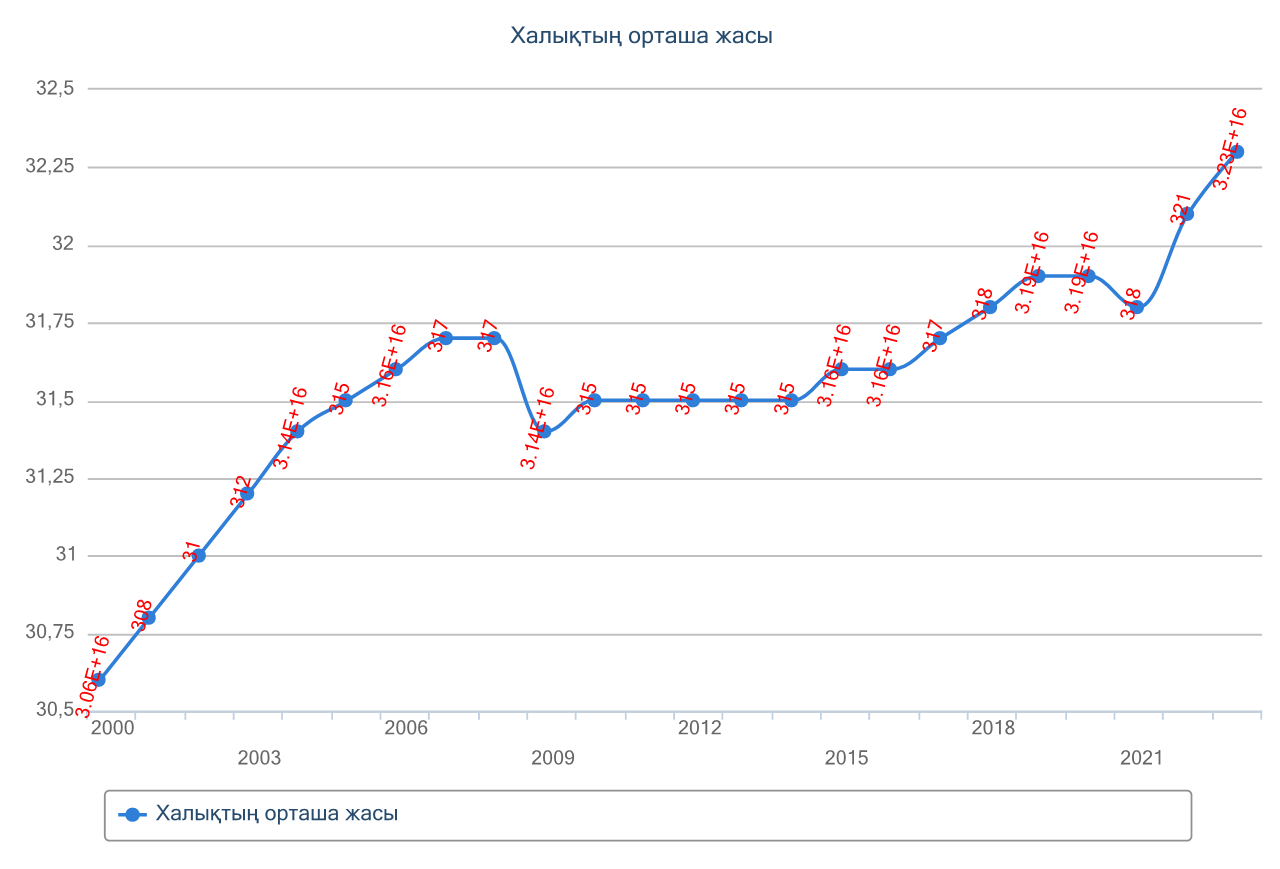

In [263]:
from IPython.display import Image

# Замените путь на путь к вашему изображению
img_path = "C:\\Users\\Asus\\Downloads\\Халықтың орташа жасы.png"  # Укажите путь к файлу на вашем компьютере
Image(filename=img_path)


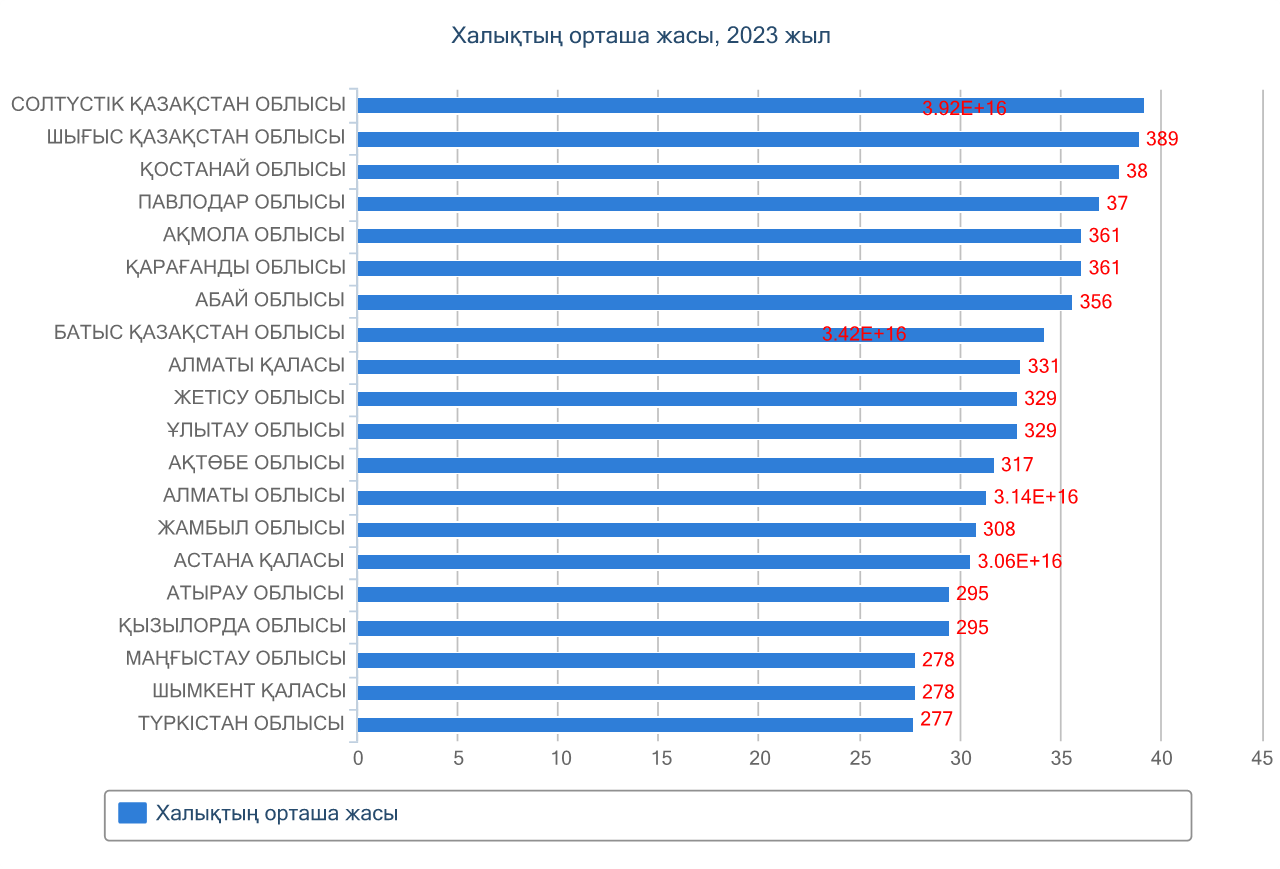

In [265]:
from IPython.display import Image

# Замените путь на путь к вашему изображению
img_path = "C:\\Users\\Asus\\Downloads\\Халықтың орташа жасы (1).png"  # Укажите путь к файлу на вашем компьютере
Image(filename=img_path)


In [267]:
import pandas as pd

# Загрузка данных
file_path = "Nas.xlsx"
df = pd.read_excel(file_path)

# Проверим данные
print(df.head())

# Преобразуем столбцы Cmin и Cout в числовой формат
df['Cmin'] = pd.to_numeric(df['Cmin'], errors='coerce')
df['Cout'] = pd.to_numeric(df['Cout'], errors='coerce')

# Проверим, что преобразование прошло успешно
print(df.info())


       Nation     Cmin     Cout
0     Барлығы  1100474  1090292
1    Қазақтар   897872   888385
2     Орыстар    71533    73646
3   Украиндар     8748     8836
4  Белорустар     1925     1919
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nation  101 non-null    object
 1   Cmin    101 non-null    int64 
 2   Cout    101 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB
None


In [269]:
# Рассчитываем чистую миграцию
df['Net Migration'] = df['Cmin'] - df['Cout']

# Посмотрим результат
print(df)


             Nation     Cmin     Cout  Net Migration
0           Барлығы  1100474  1090292          10182
1          Қазақтар   897872   888385           9487
2           Орыстар    71533    73646          -2113
3         Украиндар     8748     8836            -88
4        Белорустар     1925     1919              6
..              ...      ...      ...            ...
96           Чехтар        9        8              1
97         Жапондар        1        1              0
98        Моңғолдар       21       14              7
99   Көрсетпегендер    21907    21986            -79
100    Басқа ұлттар     1049     1012             37

[101 rows x 4 columns]


In [271]:
# Сортируем по чистой миграции
df_sorted = df.sort_values('Net Migration', ascending=False)

# Выведем 10 наибольших увеличений
print("Топ-10 наций с наибольшим увеличением численности:")
print(df_sorted.head(10))

# Выведем 10 наибольших уменьшений
print("Топ-10 наций с наибольшим уменьшением численности:")
print(df_sorted.tail(10))


Топ-10 наций с наибольшим увеличением численности:
            Nation     Cmin     Cout  Net Migration
0          Барлығы  1100474  1090292          10182
1         Қазақтар   897872   888385           9487
5         Өзбектер    29609    28571           1038
32   Қарақалпақтар     3813     2912            901
12        Тәжіктер     3946     3429            517
7   Әзербайджандар     6987     6585            402
91        Туріктер     3452     3109            343
11       Қырғыздар     2248     1965            283
82        Корейлер     5280     5040            240
13        Армяндар      564      498             66
Топ-10 наций с наибольшим уменьшением численности:
            Nation   Cmin   Cout  Net Migration
34         Комилер      2      3             -1
53        Ненецтер      1      2             -1
36       Мордвалар    175    177             -2
42        Чуваштар    174    177             -3
9      Молдавандар    562    567             -5
99  Көрсетпегендер  21907  21986      

<Figure size 1200x600 with 0 Axes>

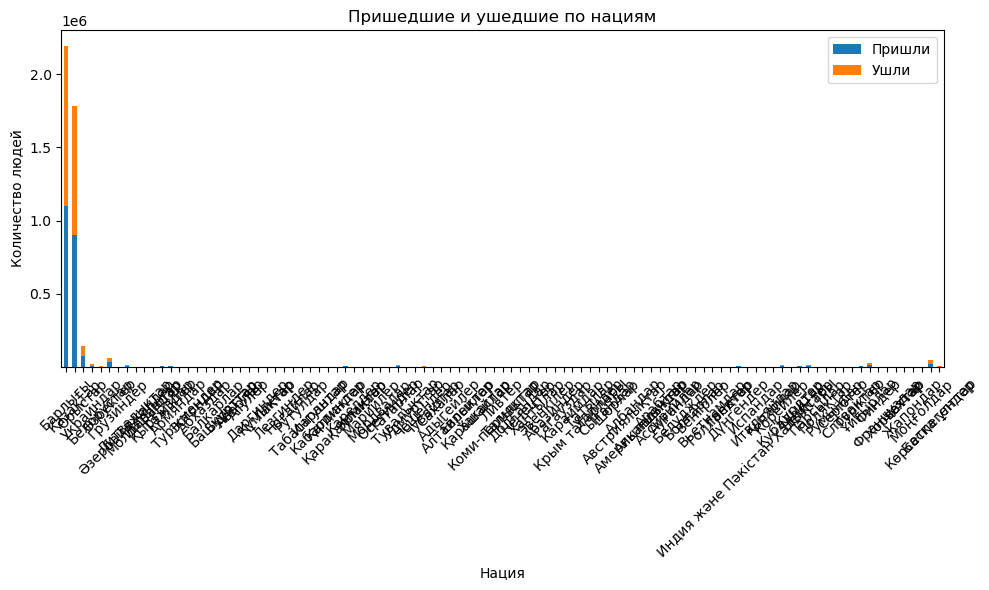

In [273]:
import matplotlib.pyplot as plt

# Столбчатая диаграмма для Cmin и Cout
plt.figure(figsize=(12, 6))
df.set_index('Nation')[['Cmin', 'Cout']].plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Пришедшие и ушедшие по нациям')
plt.xlabel('Нация')
plt.ylabel('Количество людей')
plt.xticks(rotation=45)
plt.legend(['Пришли', 'Ушли'])
plt.tight_layout()
plt.show()


In [275]:
# Среднее значение чистой миграции по нациям
average_migration = df['Net Migration'].mean()
print(f"Средняя чистая миграция: {average_migration}")


Средняя чистая миграция: 201.62376237623764


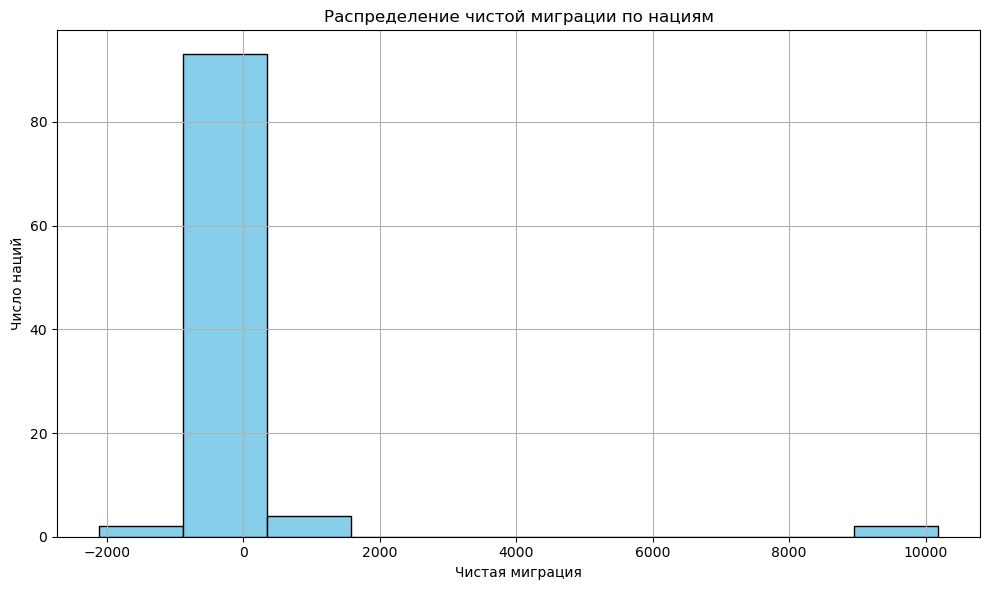

In [277]:
plt.figure(figsize=(10, 6))
plt.hist(df['Net Migration'], bins=10, color='skyblue', edgecolor='black')
plt.title('Распределение чистой миграции по нациям')
plt.xlabel('Чистая миграция')
plt.ylabel('Число наций')
plt.grid(True)
plt.tight_layout()
plt.show()


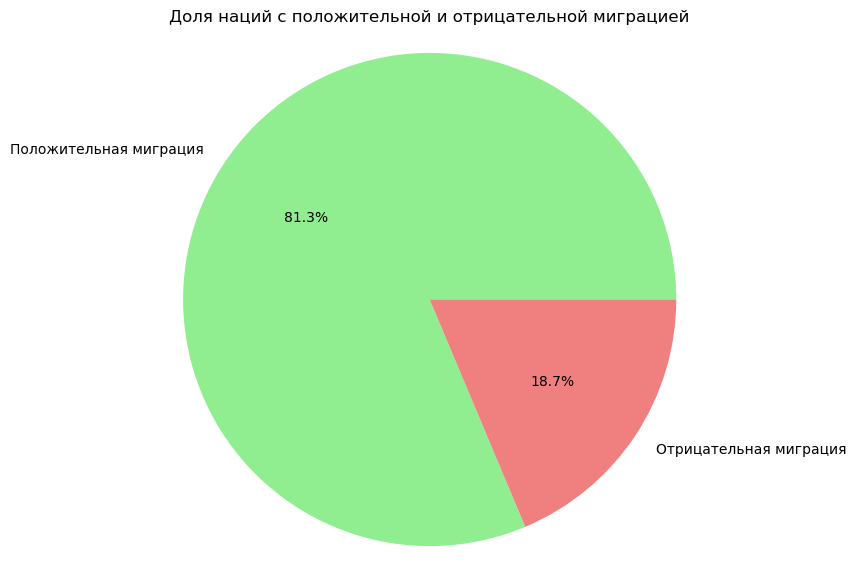

In [279]:
# Разделяем нации с положительной и отрицательной миграцией
positive_migration = df[df['Net Migration'] > 0]
negative_migration = df[df['Net Migration'] < 0]

# Строим круговую диаграмму
labels = ['Положительная миграция', 'Отрицательная миграция']
sizes = [len(positive_migration), len(negative_migration)]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Доля наций с положительной и отрицательной миграцией')
plt.axis('equal')  # Сохраняем круглый вид диаграммы
plt.show()


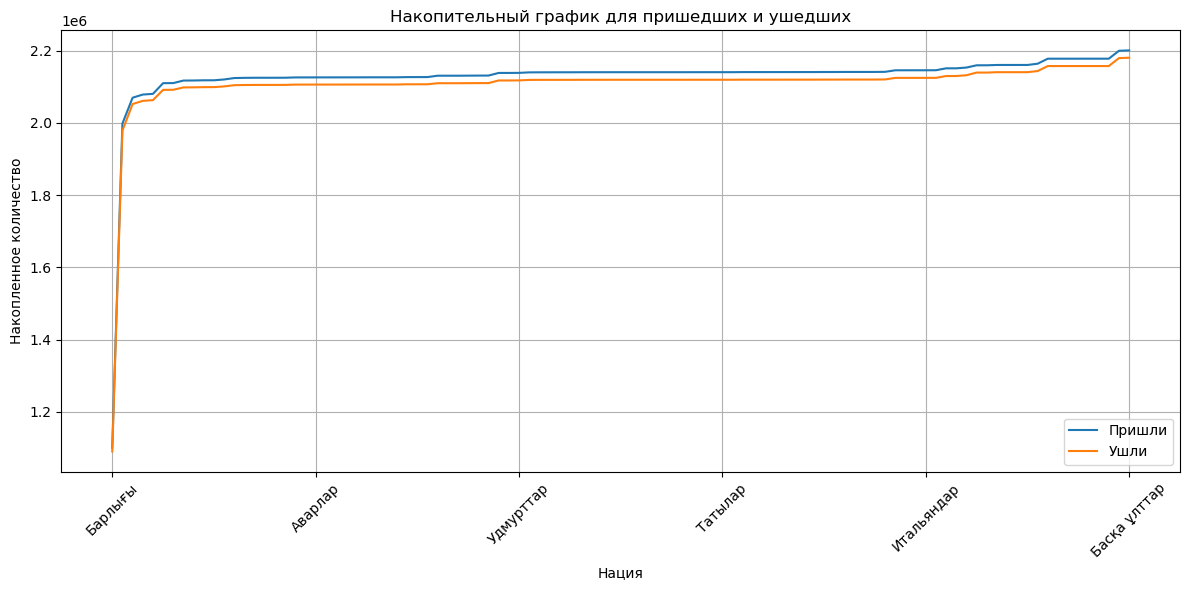

In [281]:
# Накопительный график
df.set_index('Nation')[['Cmin', 'Cout']].cumsum().plot(kind='line', figsize=(12, 6))

plt.title('Накопительный график для пришедших и ушедших')
plt.xlabel('Нация')
plt.ylabel('Накопленное количество')
plt.xticks(rotation=45)
plt.legend(['Пришли', 'Ушли'])
plt.grid(True)
plt.tight_layout()
plt.show()


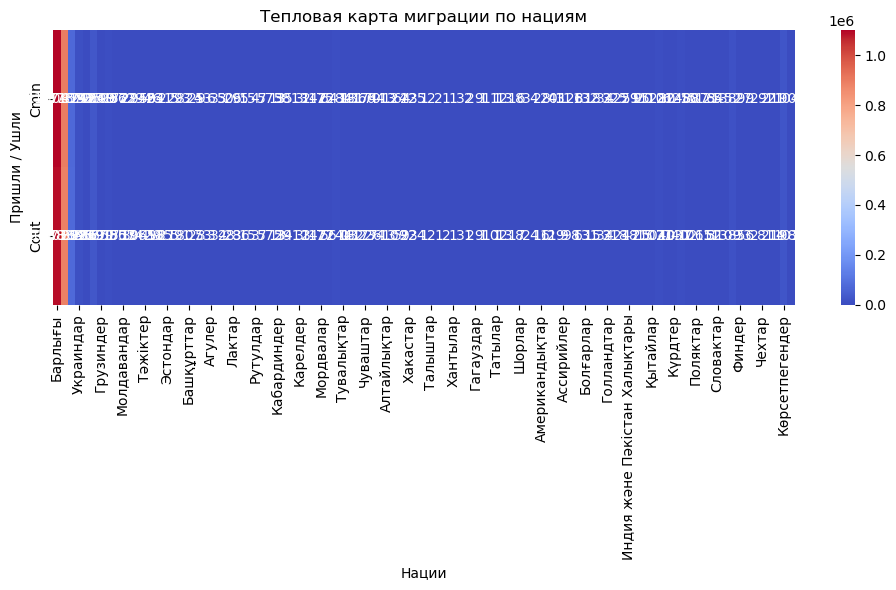

In [283]:
import seaborn as sns

# Создаем таблицу с приходящими и уходящими людьми для каждой нации
migration_data = df[['Nation', 'Cmin', 'Cout']].set_index('Nation')

# Строим тепловую карту
plt.figure(figsize=(10, 6))
sns.heatmap(migration_data.T, annot=True, cmap='coolwarm', fmt='.0f', cbar=True)
plt.title('Тепловая карта миграции по нациям')
plt.xlabel('Нации')
plt.ylabel('Пришли / Ушли')
plt.tight_layout()
plt.show()


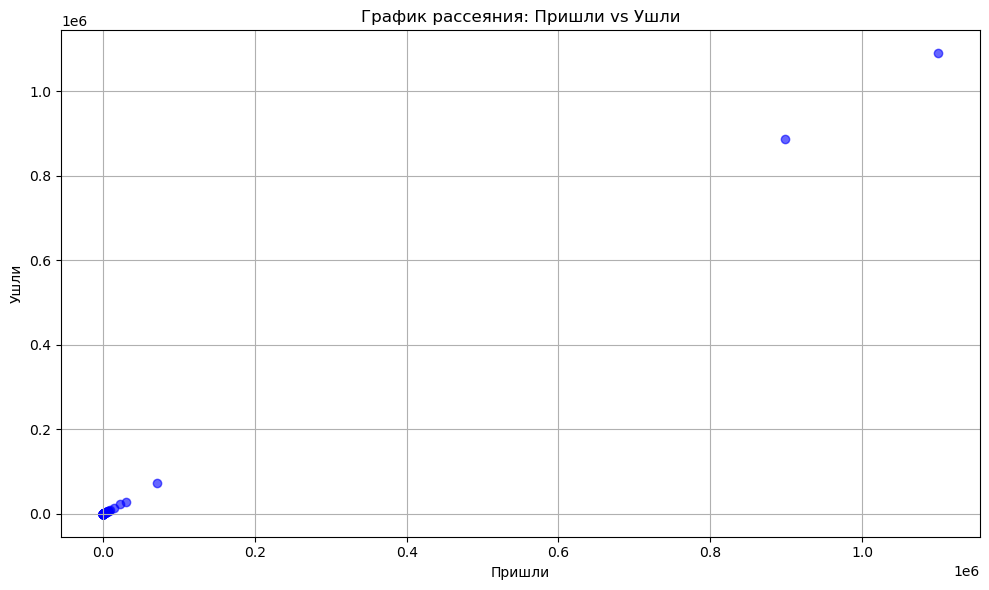

In [285]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Cmin'], df['Cout'], color='blue', alpha=0.6)
plt.title('График рассеяния: Пришли vs Ушли')
plt.xlabel('Пришли')
plt.ylabel('Ушли')
plt.grid(True)
plt.tight_layout()
plt.show()


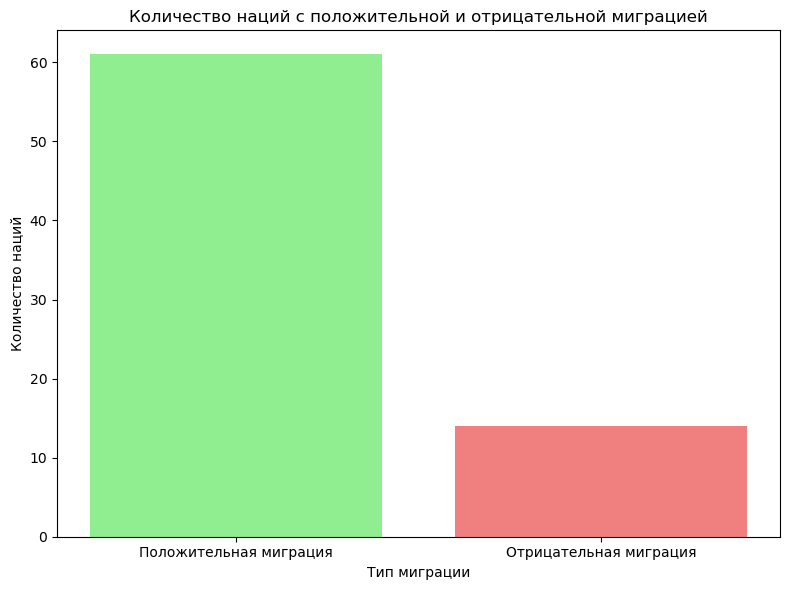

In [287]:
# Группируем по знаку чистой миграции (положительная или отрицательная)
positive_migration_count = len(positive_migration)
negative_migration_count = len(negative_migration)

# Строим бар-чарт
plt.figure(figsize=(8, 6))
plt.bar(['Положительная миграция', 'Отрицательная миграция'], 
        [positive_migration_count, negative_migration_count], 
        color=['lightgreen', 'lightcoral'])

plt.title('Количество наций с положительной и отрицательной миграцией')
plt.xlabel('Тип миграции')
plt.ylabel('Количество наций')
plt.tight_layout()
plt.show()


In [289]:
import pandas as pd

# Загрузка данных
file_path = "Nas_1.xlsx"
df = pd.read_excel(file_path)

# Проверим первые строки данных
print(df.head())

# Преобразуем столбцы с числовыми значениями в формат чисел (убираем пробелы и преобразуем к числовому типу)
df['Cmin'] = df['Cmin'].apply(lambda x: int(str(x).replace(' ', '')))
df['Cout'] = df['Cout'].apply(lambda x: int(str(x).replace(' ', '')))

# Проверим типы данных после преобразования
print(df.info())


            Old     Cmin     Cout
0       Барлығы  1100474  1090292
1   0 -   4 жас   149619   149803
2   5 -   9 жас   135175   135814
3   10 - 14 жас    96897    97541
4   15 - 19 жас    74461    73136
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Old     19 non-null     object
 1   Cmin    19 non-null     int64 
 2   Cout    19 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 588.0+ bytes
None


In [291]:
# Рассчитываем чистую миграцию (Net Migration)
df['Net Migration'] = df['Cmin'] - df['Cout']

# Проверим результат
print(df[['Old', 'Cmin', 'Cout', 'Net Migration']])


                    Old     Cmin     Cout  Net Migration
0               Барлығы  1100474  1090292          10182
1           0 -   4 жас   149619   149803           -184
2           5 -   9 жас   135175   135814           -639
3           10 - 14 жас    96897    97541           -644
4           15 - 19 жас    74461    73136           1325
5           20 - 24 жас   100297    98529           1768
6           25 - 29 жас    97544    95418           2126
7           30 - 34 жас   104862   103074           1788
8           35 - 39 жас    89849    88443           1406
9           40 - 44 жас    63335    62612            723
10          45 - 49 жас    46091    45633            458
11          50 - 54 жас    38291    37864            427
12          55 - 59 жас    31902    31388            514
13          60 - 64 жас    35408    34872            536
14          65 - 69 жас    17923    17621            302
15          70 - 74 жас    10436    10248            188
16          75 - 79 жас     464

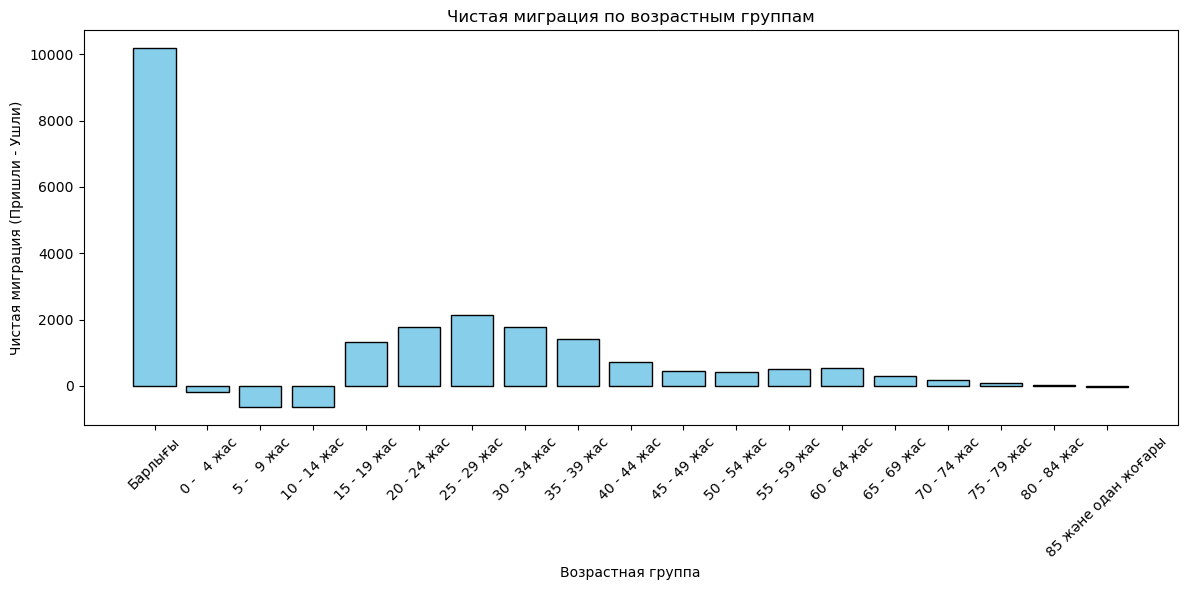

In [293]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Строим график чистой миграции по возрастным группам
plt.bar(df['Old'], df['Net Migration'], color='skyblue', edgecolor='black')

plt.title('Чистая миграция по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Чистая миграция (Пришли - Ушли)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


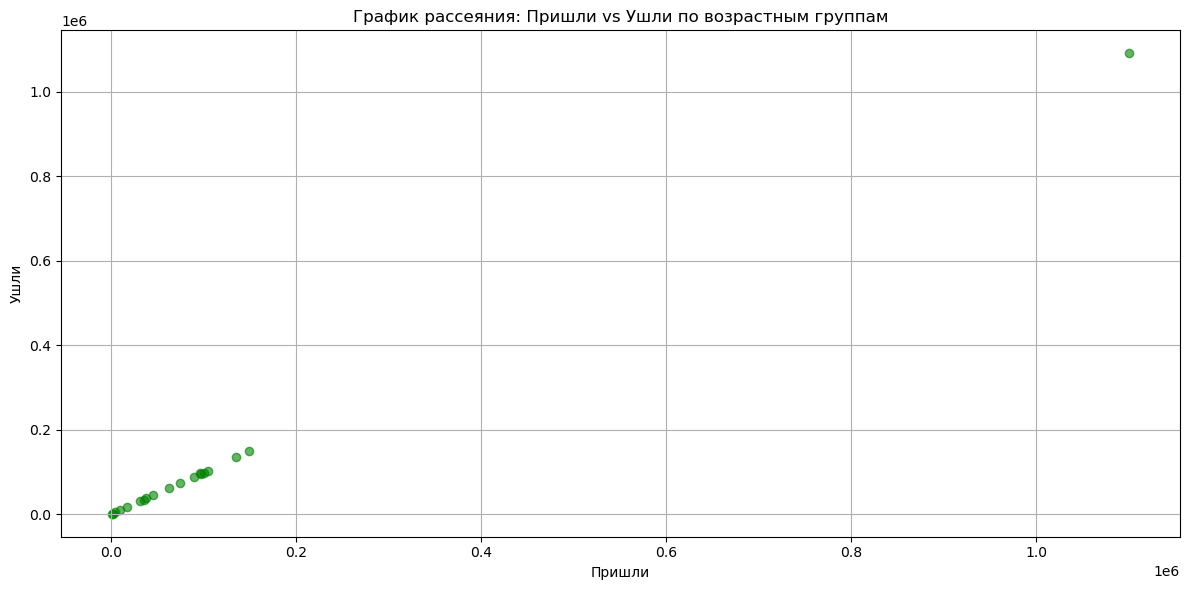

In [295]:
plt.figure(figsize=(12, 6))

# График рассеяния
plt.scatter(df['Cmin'], df['Cout'], color='green', alpha=0.6)
plt.title('График рассеяния: Пришли vs Ушли по возрастным группам')
plt.xlabel('Пришли')
plt.ylabel('Ушли')
plt.grid(True)
plt.tight_layout()
plt.show()


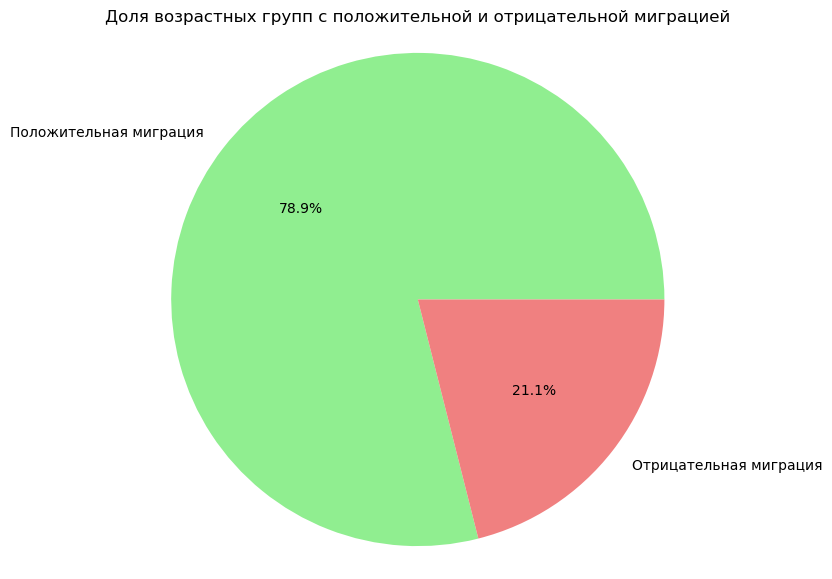

In [297]:
# Разделяем нации с положительной и отрицательной миграцией
positive_migration = df[df['Net Migration'] > 0]
negative_migration = df[df['Net Migration'] < 0]

# Строим круговую диаграмму
labels = ['Положительная миграция', 'Отрицательная миграция']
sizes = [len(positive_migration), len(negative_migration)]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Доля возрастных групп с положительной и отрицательной миграцией')
plt.axis('equal')  # Сохраняем круглый вид диаграммы
plt.show()


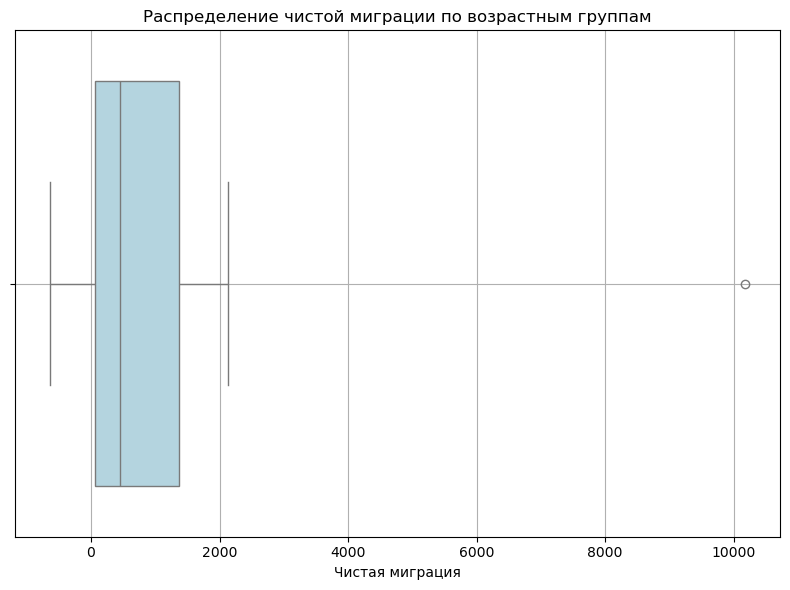

In [299]:
import seaborn as sns

plt.figure(figsize=(8, 6))

# Бокс-плот для чистой миграции
sns.boxplot(x=df['Net Migration'], color='lightblue')

plt.title('Распределение чистой миграции по возрастным группам')
plt.xlabel('Чистая миграция')
plt.grid(True)
plt.tight_layout()
plt.show()


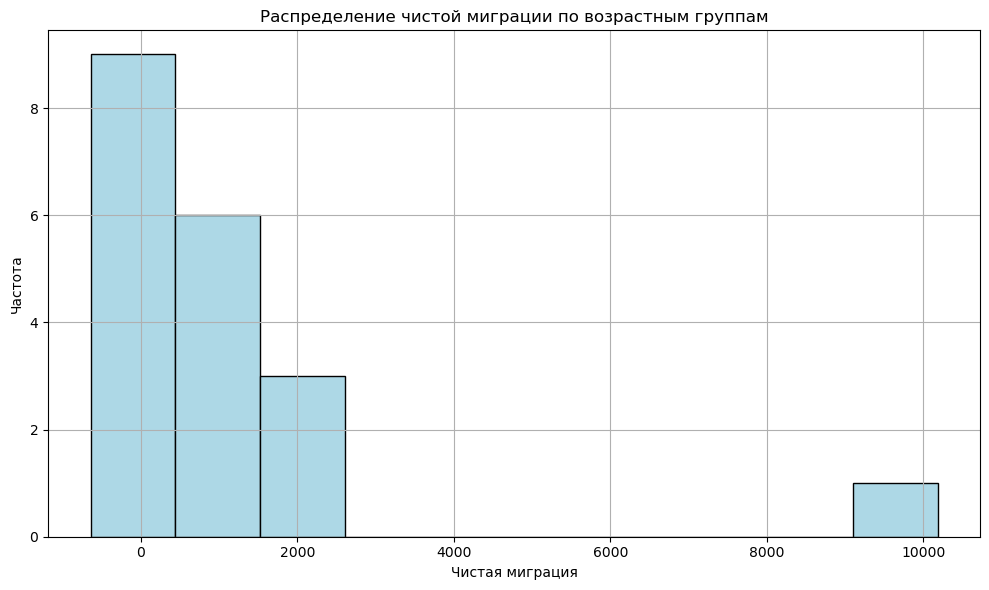

In [301]:
plt.figure(figsize=(10, 6))
plt.hist(df['Net Migration'], bins=10, color='lightblue', edgecolor='black')
plt.title('Распределение чистой миграции по возрастным группам')
plt.xlabel('Чистая миграция')
plt.ylabel('Частота')
plt.grid(True)
plt.tight_layout()
plt.show()
